## 라이브러리 import
- <span style="color:brown; font-style:italic;">필수</span>
    - pandas
    - numpy
    - maplotlib
    - seaborn
    - datatime

 
- <span style="color:brown; font-style:italic;">AI</span>
    - RandomForestClassifier
    - train_test_split
    - classification_report
    - LinearRegression
- <span style="color:brown; font-style:italic;">선택사항</span>
    - warnings
    - os

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['font.family']
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import os
os.getcwd()
import datetime as dt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [3]:
os.listdir('./origin')

['Customer_info.csv',
 'Discount_info.csv',
 'Marketing_info.csv',
 'Onlinesales_info.csv',
 'Tax_info.csv']

## 데이터 전처리
- <span style="color:brown; font-style:italic;">merge</span>
    - Onlinesales_info.csv
    - Customer_info.csv
    - Tax_info.csv
- <span style="color:brown; font-style:italic;">Feature Engineering</span>
    - 총 거래비용 = 평균금액 * 수량 * ( 1 + 세금 ) + 배송료
    - To Do
        - 쿠폰 적용 가격 컬럼

In [4]:
Onlinesales_info = pd.read_csv('./origin/Onlinesales_info.csv')
Customer_info = pd.read_csv('./origin/Customer_info.csv')
Tax_info = pd.read_csv('./origin/Tax_info.csv')
# display(Onlinesales_info.isnull().sum(), Onlinesales_info.shape)
# display(Customer_info.isnull().sum(), Customer_info.shape)
# display(Tax_info.isnull().sum(), Tax_info.shape)

In [5]:
first_merge = pd.merge(Onlinesales_info, Customer_info, on = '고객ID', how = 'outer')
total_information = pd.merge(first_merge, Tax_info, on = '제품카테고리', how = 'outer')
# display(first_merge.isnull().sum(), first_merge.shape)
# display(total_inforamtion.isnull().sum(), total_inforamtion.shape)

In [6]:
def col_list(target, feature): # merge 과정에서 컬럼의 누락 등이 발생했는지 확인
    # print(target)
    for i in list(feature.columns):
        target.append(i)
    target_list = list(set(target))
    return target_list

def check_col(list1, list2):
    list1.sort()
    list2.sort()
    print(list1==list2)
check_list = []
check_list = col_list(check_list, Onlinesales_info)
check_list = col_list(check_list, Customer_info)
check_list = col_list(check_list, Tax_info)

check_col(check_list, list(total_information.columns))

True


In [7]:
total_information['Total_Purchase_Amount'] = total_information['평균금액']*total_information['수량']*(1+total_information['GST']) + total_information['배송료']
# display(total_information, total_information.isnull().sum(), total_information.info())
total_information.to_csv('./preprocessing/total_information.csv', index=False)
total_information = pd.read_csv('./preprocessing/total_information.csv')
display(total_information, total_information.isnull().sum(), total_information.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   고객ID                   52924 non-null  object 
 1   거래ID                   52924 non-null  object 
 2   거래날짜                   52924 non-null  object 
 3   제품ID                   52924 non-null  object 
 4   제품카테고리                 52924 non-null  object 
 5   수량                     52924 non-null  int64  
 6   평균금액                   52924 non-null  float64
 7   배송료                    52924 non-null  float64
 8   쿠폰상태                   52924 non-null  object 
 9   성별                     52924 non-null  object 
 10  고객지역                   52924 non-null  object 
 11  가입기간                   52924 non-null  int64  
 12  GST                    52924 non-null  float64
 13  Total_Purchase_Amount  52924 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 5.7+ 

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,GST,Total_Purchase_Amount
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,0.10,175.5810
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,0.10,175.5810
2,USER_1358,Transaction_0013,2019-01-01,Product_0983,Nest-USA,2,122.77,6.50,Not Used,남,Chicago,12,0.10,276.5940
3,USER_1358,Transaction_0015,2019-01-01,Product_0984,Nest-USA,1,81.50,6.50,Clicked,남,Chicago,12,0.10,96.1500
4,USER_1358,Transaction_0016,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Clicked,남,Chicago,12,0.10,175.5810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0442,Transaction_7918,2019-05-04,Product_0850,More Bags,5,17.59,18.12,Clicked,여,California,13,0.18,121.9010
52920,USER_0557,Transaction_7940,2019-05-04,Product_0850,More Bags,1,17.59,6.00,Not Used,남,California,36,0.18,26.7562
52921,USER_1374,Transaction_8818,2019-05-19,Product_0850,More Bags,1,21.99,6.00,Used,여,Chicago,27,0.18,31.9482
52922,USER_0994,Transaction_9049,2019-05-22,Product_0850,More Bags,1,17.59,51.99,Used,여,New York,46,0.18,72.7462


고객ID                     0
거래ID                     0
거래날짜                     0
제품ID                     0
제품카테고리                   0
수량                       0
평균금액                     0
배송료                      0
쿠폰상태                     0
성별                       0
고객지역                     0
가입기간                     0
GST                      0
Total_Purchase_Amount    0
dtype: int64

None

## Cohort CSV 생성
<span style="color:brown; font-style:italic;">사용 CSV</span>
- cohort.csv
- retention.csv
- co_purchase.csv

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.060465,0.111628,0.158140,0.106977,0.204651,0.162791,0.218605,0.106977,0.130233,0.093023,0.15814
1,1.0,0.072917,0.093750,0.166667,0.177083,0.229167,0.197917,0.156250,0.125000,0.114583,0.166667,NaN
2,1.0,0.101695,0.197740,0.141243,0.180791,0.186441,0.124294,0.124294,0.084746,0.107345,NaN,NaN
3,1.0,0.085890,0.147239,0.147239,0.110429,0.092025,0.061350,0.098160,0.073620,NaN,NaN,NaN
4,1.0,0.107143,0.080357,0.116071,0.089286,0.116071,0.125000,0.071429,NaN,NaN,NaN,NaN
5,1.0,0.145985,0.160584,0.087591,0.080292,0.102190,0.080292,NaN,NaN,NaN,NaN,NaN
6,1.0,0.138298,0.042553,0.063830,0.117021,0.095745,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0,0.103704,0.111111,0.074074,0.059259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,0.076923,0.038462,0.025641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,0.068966,0.045977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,0,1,2,3,4,5,6,7,8,9,10,11
0,508514.7551,49784.6856,64142.5787,136619.1519,37938.0847,64941.1638,103192.3727,63845.5539,50049.6573,54859.6360,46675.3220,108822.663
1,347080.9714,10790.6607,15816.3338,27845.3921,29272.5815,52488.0460,30126.2571,54556.0959,20170.3275,33249.6095,55215.2866,NaN
2,378271.8279,49417.8369,45043.3898,37257.0493,57979.0999,84903.4851,58303.3383,47338.3423,28720.4471,42783.4613,NaN,NaN
3,290706.3843,28735.0564,20328.1163,36830.3649,31477.7593,36086.3232,18730.5268,64759.7279,21383.5292,NaN,NaN,NaN
4,247217.3724,8277.2382,15394.8251,18791.0656,20448.6132,44002.9696,43811.6734,13373.1959,NaN,NaN,NaN,NaN
5,236926.7848,13735.8622,16507.9096,19569.1335,12427.2960,43054.1566,18107.3596,NaN,NaN,NaN,NaN,NaN
6,185668.4481,18169.9318,8556.9241,17177.5039,27456.6556,33631.0107,NaN,NaN,NaN,NaN,NaN,NaN
7,243114.6476,12446.8954,13194.2294,33103.3770,19271.6494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,180805.4449,2284.4464,2963.5980,768.4927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,265442.4406,11231.6505,3295.4565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


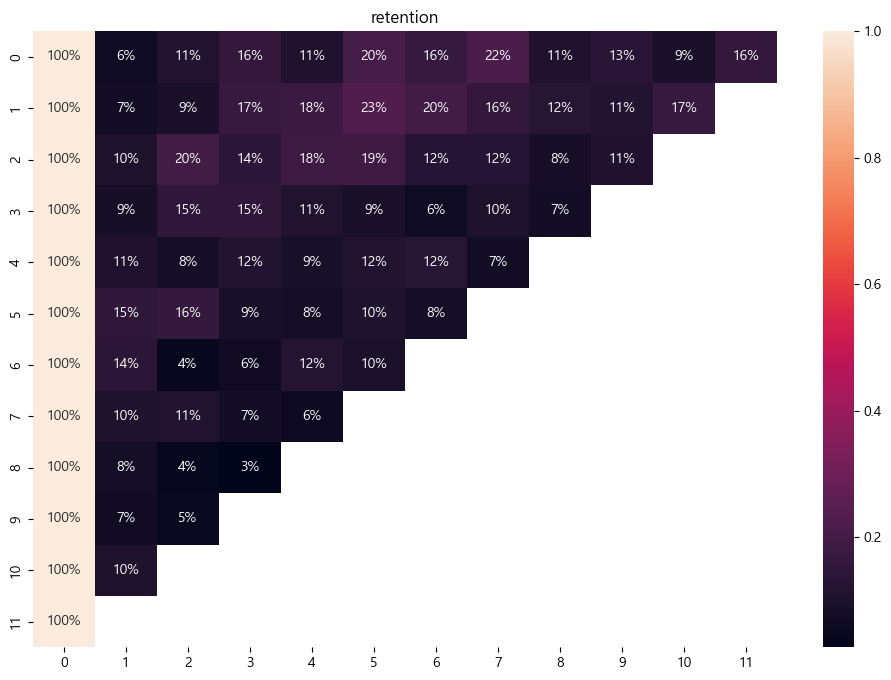

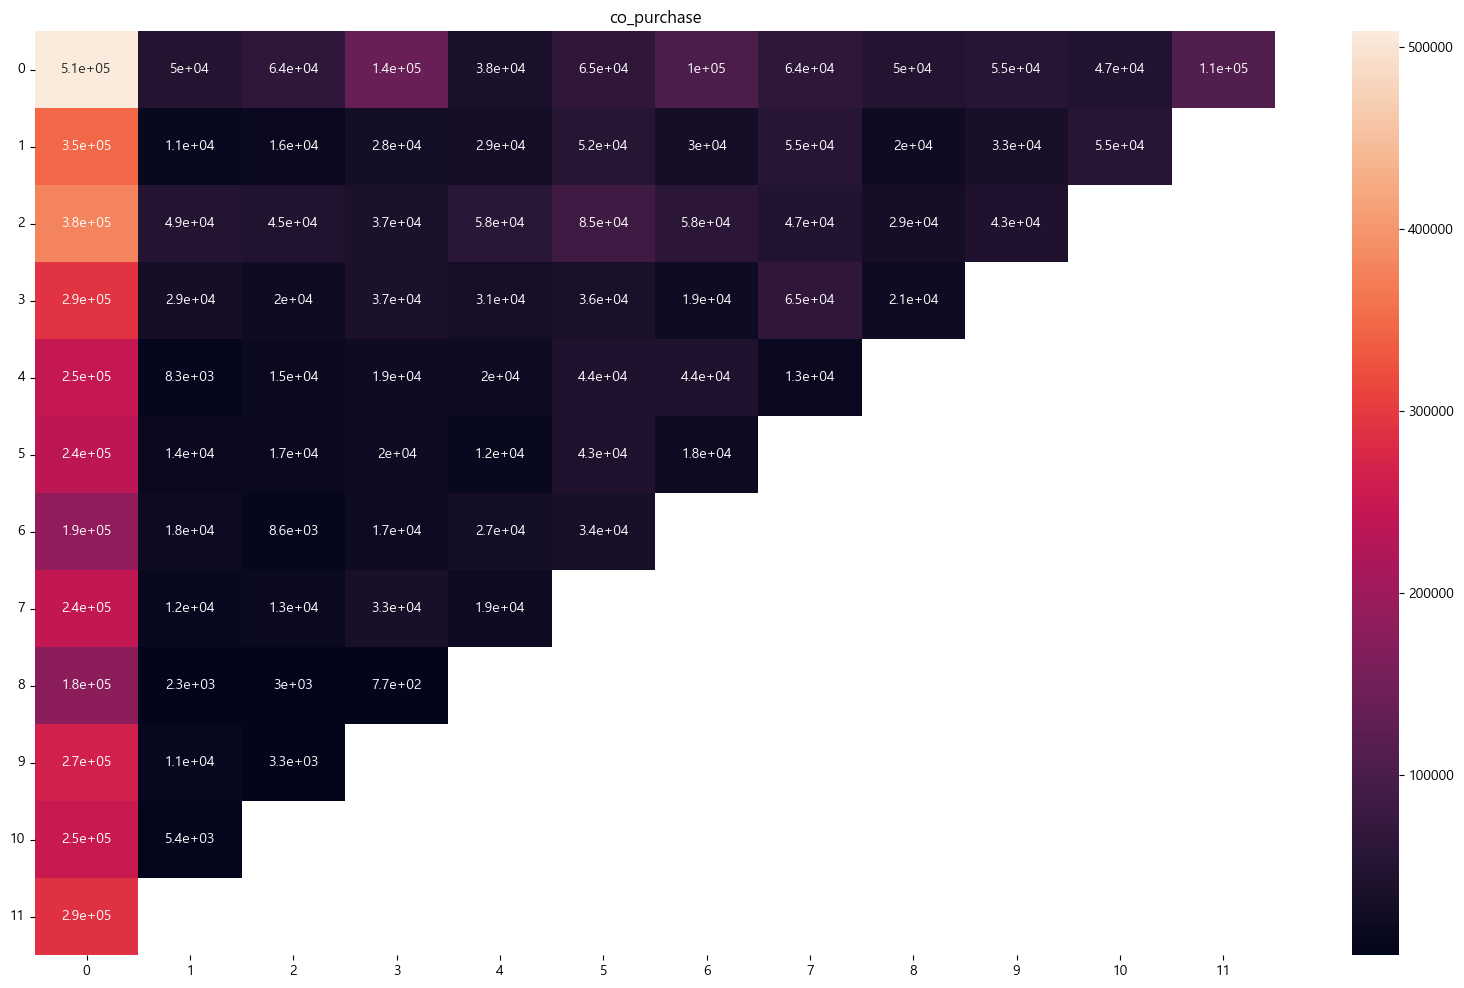

In [8]:
def First_OrderMonth(df, ref_month, customer_col): # 첫 주문월과 구매 주기 컬럼 추가
    df[ref_month] = pd.to_datetime(df[ref_month])
    df['OrderCycle'] = df['거래날짜'].dt.strftime('%Y-%m')
    first_order = df.groupby(customer_col)[ref_month].min()
    first_order = first_order.dt.strftime('%Y-%m')
    df.set_index(customer_col, inplace = True)
    df['First_Order'] = first_order
    df.reset_index(inplace=True)
    return df

def CohortPeriod(df, first_order, order_cycle): # 코호트 주기 계산
    temp = []
    for i in range(df.shape[0]):
        f_first_order = pd.to_datetime(df[first_order][i]).to_period('M')
        f_order_cycle = pd.to_datetime(df[order_cycle][i]).to_period('M')
        month_diff = (f_order_cycle-f_first_order).n
        temp.append(month_diff)
    df['CohortPeriod'] = temp
    return df

def CohrotFrame(df, first_order, target_col, cohort_period, ratio=None): # pandas unstack 진행
    df = df.set_index([first_order, cohort_period])
    df = df[target_col].unstack(1)
    if ratio is not None:
        df = df.div(df[0], axis=0)
    return df
    
cohort = total_information.drop([ '수량', '제품카테고리', '평균금액', '배송료', '쿠폰상태', '성별', '고객지역', '가입기간', 'GST'], axis=1)
cohort = First_OrderMonth(cohort, '거래날짜', '고객ID')
# 예시) 첫 주문월이 1월인 고객 중에서 2월에 다시 방문한 고객의 숫자, 첫 주문월에 X원만큼 쓴 고객이 2월에 쓴 금액
co1, co2 = cohort.groupby(['First_Order', 'OrderCycle'])['고객ID'].nunique(), cohort.groupby(['First_Order', 'OrderCycle'])['Total_Purchase_Amount'].sum()
co1, co2 = co1.reset_index() , co2.reset_index()
co = pd.merge(co1, co2, on = ['First_Order', 'OrderCycle'])

co = CohortPeriod(co, 'First_Order', 'OrderCycle') # 코호트 주기 계산
co.rename({'고객ID':'TotalUsers'}, axis = 1,inplace=True)

co.to_csv('./preprocessing/cohort.csv', index=False) # 코호트 csv 저장
co = pd.read_csv('./preprocessing/cohort.csv')
# display(co, co.isnull().sum(), co.info())

retention, co_purchase = CohrotFrame(co, 'First_Order', 'TotalUsers', 'CohortPeriod', ratio = True), CohrotFrame(co, 'First_Order', 'Total_Purchase_Amount', 'CohortPeriod', ratio = None)
retention.to_csv('./preprocessing/retention.csv', index=False)
co_purchase.to_csv('./preprocessing/co_purchase.csv', index=False)
retention, co_purchase = pd.read_csv('./preprocessing/retention.csv'), pd.read_csv('./preprocessing/co_purchase.csv')
display(retention, co_purchase)

plt.rcParams['figure.figsize'] = (12,8)
sns.heatmap(retention, annot=True, fmt = '.0%')
plt.title('retention')
plt.show()

plt.rcParams['figure.figsize'] = (20,12)
sns.heatmap(co_purchase, annot=True)
plt.title('co_purchase')
plt.yticks(rotation=360)
plt.show()

## 코호트 분석을 위한 Class 정의

In [9]:
class cohort_analysis: # chort_csv를 분석하기 위한 class
    def __init__(self, csv): # 생성자 메서드
        self.df = csv
                
    #################################### Cohort ##############################################
    def change_index_col_number(self, feature, month_colname): # 인덱스 이름 변경, 
        number_set = [i+1 for i in range(len(self.df.columns)) ] # 다루기 쉽도록 컬럼 이름을 0, 1, 2에서 1, 2, 3으로 변경
        self.df.columns = number_set
        self.df.index = list(feature[month_colname]) # 인덱스 이름들을 feature의 특정 컬럼값들로 변경

    def change_for_cohort_graph(self): # 코호트 그래프를 그리기 위해 데이터프레임 변형
        cohort_df_transpose = self.df.T
        cohort_df_new = cohort_df_transpose.copy()
        cohort_df_new.loc[:] = 0 # 0으로 채워진 컬럼 생성, 새로운 데이터프레임을 위한 초석
        for i in cohort_df_new.columns: # 2019-01 등이 컬럼명으로 바뀐 상태
            if i.month ==1: # 1월에 해당하는 데이터는 값을 모두 채운다.
                cohort_df_new[i].loc[:] = list( cohort_df_transpose[i][:] )
            else:
                cohort_df_new.loc[i.month: , i] = list( cohort_df_transpose[i])[: - i.month+1]
                # 2월이면 인덱스 2부터 끝까지 값을 채운다.
                # 2월이라고 생각하면 맨 마지막 값은 없으므로 [ : - (2+1) ] = [ : -1] 마지막에서 하나 빼고 읽는다.
        self.cohort_df_transpose = cohort_df_transpose
        self.cohort_df_new = cohort_df_new

    def cohort_graph(self, xlim = None, ylim = None, title = None):
        colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", # 짙은 파란색, 주황색, 초록색, 빨간색, 보라색, 갈색, 
                  "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#aec7e8", "#ffbb78" ] # 분홍색, 회색, 녹색이 섞인 노란색, 청록색, 밝은 파란색. 밝은 주황색
        self.cohort_df_new.index = list(self.cohort_df_new.columns.astype(str))
        plt.figure(figsize=(20,5))
        for i in self.cohort_df_new.columns:
            if i.month ==1:
                plt.plot(self.cohort_df_new.index, self.cohort_df_new[i], marker='o', label = i, color =  colors[i.month-1])
            else: # 1월이 아닌 경우에는 시작점을 다르게 한다. 예를 들어 2월인 경우에는 두 번째부터 그래프를 그리도록 한다.
                plt.plot(self.cohort_df_new.index[i.month-1:], self.cohort_df_new[i][i.month-1:], marker='o', label = i, color =  colors[i.month-1])
        if xlim is not None:
            plt.xlim(xlim)
        if ylim is not None: 
            plt.ylim(ylim)
        if title is not None:
            plt.title(title)
        plt.legend()
        plt.xticks(rotation=45)
        plt.grid()
        plt.show()
    
    def cohort_graph_subplot(self, xlim=None, ylim=None, title = None):
        colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", # 짙은 파란색, 주황색, 초록색, 빨간색, 보라색, 갈색, 
                  "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#aec7e8", "#ffbb78" ] # 분홍색, 회색, 녹색이 섞인 노란색, 청록색, 밝은 파란색. 밝은 주황색
        self.cohort_df_new.index = list(self.cohort_df_new.columns.astype(str))
        plt.figure(figsize=(15,20))
        for i in self.cohort_df_new.columns:
            if i.month ==1:
                plt.subplot(6, 2, i.month)
                plt.plot(self.cohort_df_new.index, self.cohort_df_new[i], marker='o', label = i, color =  colors[i.month-1], linewidth = '1.1')
                if xlim is not None:
                    plt.xlim(xlim)
                if ylim is not None:
                    plt.ylim(ylim)
                if title is not None:
                    plt.title(title)
                plt.legend()
                plt.xticks(rotation=30)
                plt.grid()
            else:
                plt.subplot(6, 2, i.month)
                plt.plot(self.cohort_df_new.index[i.month-1:], self.cohort_df_new[i][i.month-1:], marker='o', label = i, color =  colors[i.month-1], linewidth = '1.1')
                if xlim is not None:
                    plt.xlim(xlim)
                if ylim is not None:
                    plt.ylim(ylim)
                   
                plt.legend()
                plt.xticks(rotation=30)
                plt.grid()
        
        plt.show()

## 그래프 작성을 위한 함수 정의

In [10]:
def x_y_graph(df, x, y, how, title = None ): # x축, y축의 plot 그래프 그리기
    df[x] = df[x].astype(str)
    plt_func = getattr(plt, how, plt.plot)
    plt_func(x, y, data = df)
    if title is not None:
        plt.title(f"{title}\n{x} : {y}")
    else:
        plt.title(f"{x} : {y}")
    plt.xticks(rotation = 45)
    plt.grid()
    plt.legend()
    plt.show()

def to_month(df, x): # 특정 컬럼 데이터 형식을 월 형식으로 변경 후 문자형 타입으로 변형
    df[x] = pd.to_datetime(df[x])
    df[x] = df[x].dt.to_period('M')
    df[x] = df[x].astype(str)
    return df

## Calendar_control Class

In [11]:
class calendar_control: # 달력을 원하는 형태로 가공하기 위한 클래스
    def __init__(self, start_month, number, col_name):
        self.col_name = col_name
        self.df = pd.DataFrame({self.col_name: [] })
        self.start_month = start_month
        self.year, self.month = map(int, self.start_month.split('-')) 
        self.number = number

    def calendar_maker(self):
        month_list = []
        fin_list = []
        for i in range(self.month, self.number+1): # month를 원하는 만큼 채운다.
            month_list.append(i)
        for i in month_list: 
            fin_list.append(str(self.year) + '-' + str(i))
        self.df[self.col_name] = fin_list
        self.df[self.col_name] = pd.to_datetime(self.df[self.col_name]).dt.to_period('M')

cal = calendar_control('2019-01', 12, 'month') # 12월까지 달력을 생성
cal.calendar_maker()
cal_df = cal.df
# cal_df

## 그래프 분석

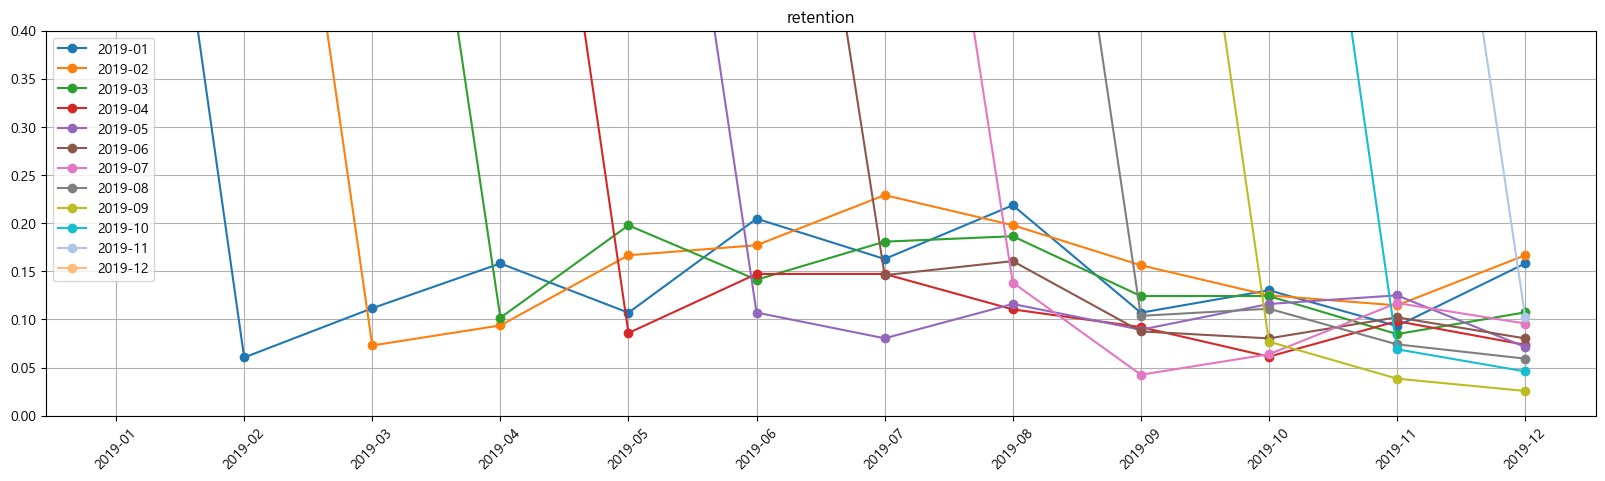

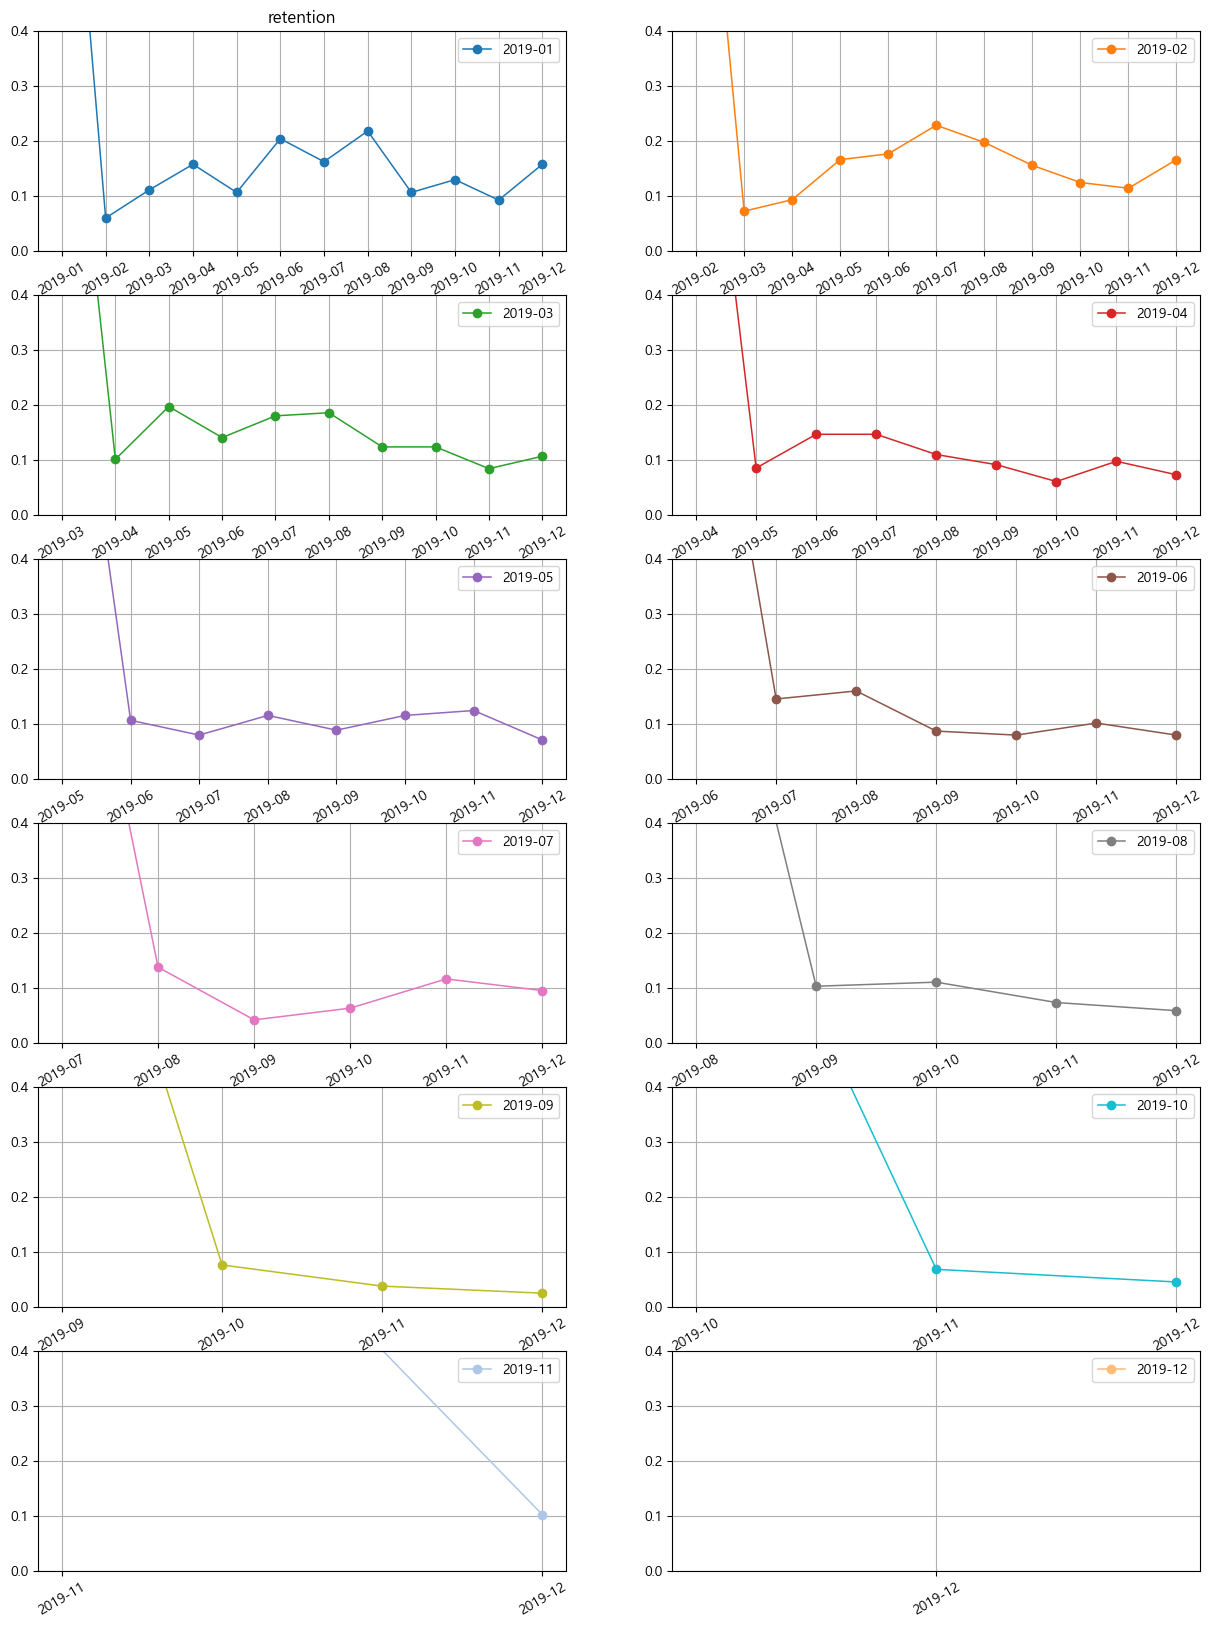

In [12]:
retention = cohort_analysis(pd.read_csv('./preprocessing/retention.csv') )
retention.change_index_col_number(feature = cal_df, month_colname = 'month')

retention.change_for_cohort_graph()
# display(retention.df)
# display(retention.cohort_df_transpose)
# display(retention.cohort_df_new)

# retention.cohort_graph()
retention.cohort_graph(title = 'retention', xlim = None, ylim = [0, 0.4])

# retention.cohort_graph_subplot()
retention.cohort_graph_subplot(title = 'retention', xlim = None, ylim = [0, 0.4])

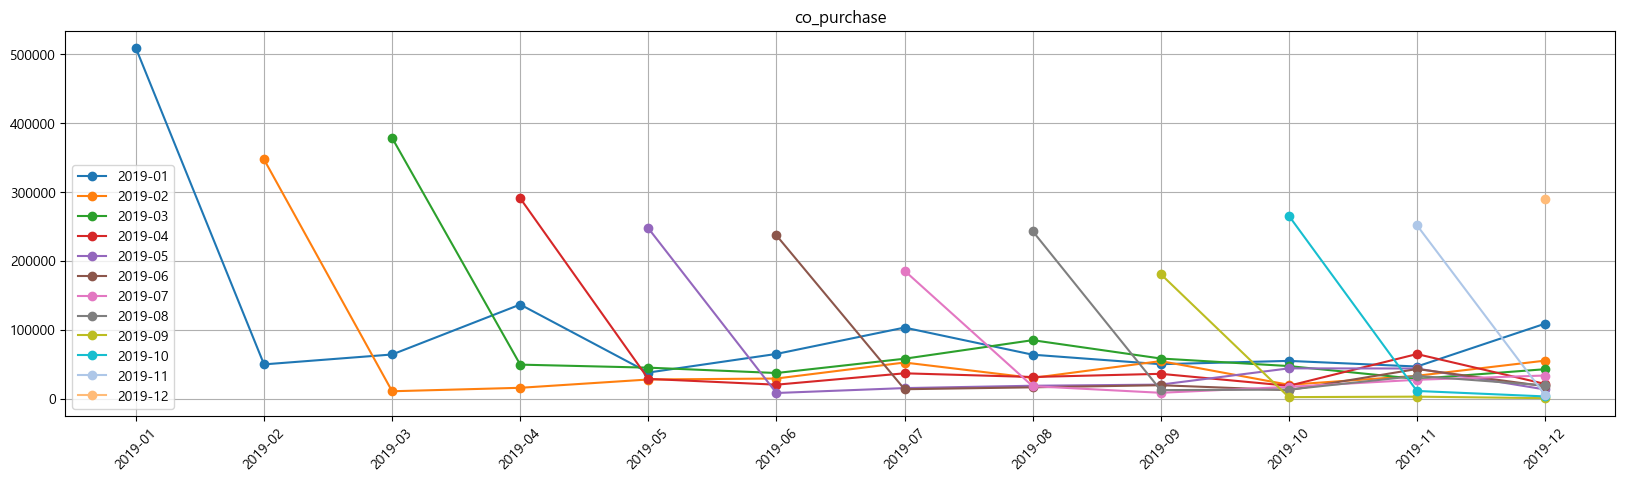

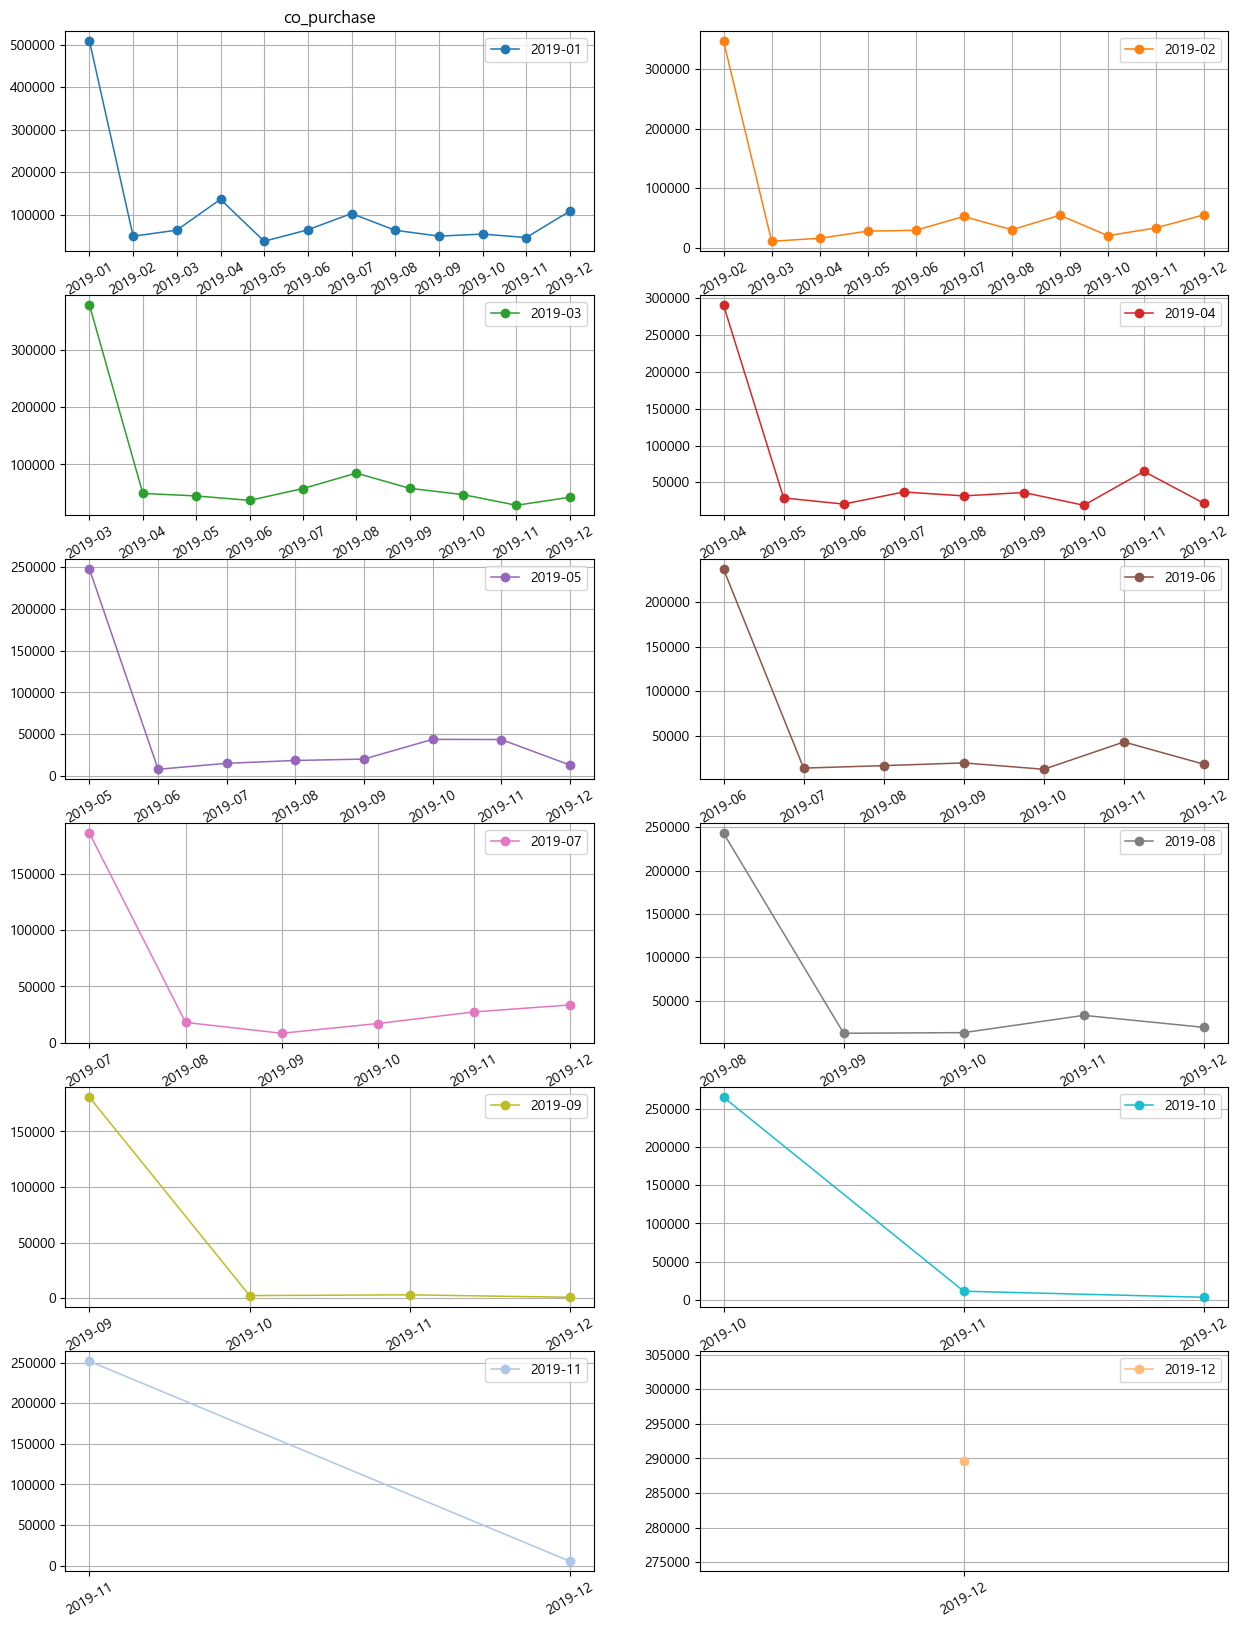

In [13]:
co_purchase = cohort_analysis(pd.read_csv('./preprocessing/co_purchase.csv'))
co_purchase.change_index_col_number(feature = cal_df, month_colname = 'month')
# co_purchase.check()
co_purchase.change_for_cohort_graph()
# co_purchase.cohort_graph()
co_purchase.cohort_graph(title = 'co_purchase')
co_purchase.cohort_graph_subplot(title = 'co_purchase')

In [14]:
# total_information
total_information = pd.read_csv('./preprocessing/total_information.csv')
total_information_temp = to_month(df=total_information, x='거래날짜')
display(total_information_temp)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,GST,Total_Purchase_Amount
0,USER_1358,Transaction_0000,2019-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,0.10,175.5810
1,USER_1358,Transaction_0001,2019-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,0.10,175.5810
2,USER_1358,Transaction_0013,2019-01,Product_0983,Nest-USA,2,122.77,6.50,Not Used,남,Chicago,12,0.10,276.5940
3,USER_1358,Transaction_0015,2019-01,Product_0984,Nest-USA,1,81.50,6.50,Clicked,남,Chicago,12,0.10,96.1500
4,USER_1358,Transaction_0016,2019-01,Product_0981,Nest-USA,1,153.71,6.50,Clicked,남,Chicago,12,0.10,175.5810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0442,Transaction_7918,2019-05,Product_0850,More Bags,5,17.59,18.12,Clicked,여,California,13,0.18,121.9010
52920,USER_0557,Transaction_7940,2019-05,Product_0850,More Bags,1,17.59,6.00,Not Used,남,California,36,0.18,26.7562
52921,USER_1374,Transaction_8818,2019-05,Product_0850,More Bags,1,21.99,6.00,Used,여,Chicago,27,0.18,31.9482
52922,USER_0994,Transaction_9049,2019-05,Product_0850,More Bags,1,17.59,51.99,Used,여,New York,46,0.18,72.7462


In [15]:
def customer_unit_price(df, customer_col, Purchase_col, period_col):
    df_customer = df.groupby(period_col, as_index=False)[customer_col].nunique()
    df_purchase = df.groupby(period_col, as_index=False)[Purchase_col].sum()
    df_unit_price = pd.merge(df_customer, df_purchase, on=period_col)
    df_unit_price['customer_unit_price'] = df_unit_price[Purchase_col]/df_unit_price[customer_col]
    return df_unit_price
total_customer_unit_price = customer_unit_price(df=total_information_temp, customer_col='고객ID', Purchase_col='Total_Purchase_Amount', period_col='거래날짜')
total_customer_unit_price

,거래날짜,고객ID,Total_Purchase_Amount,customer_unit_price
0,2019-01,215,508514.7551,2365.184907
1,2019-02,109,396865.6570,3640.969330
2,2019-03,208,453205.0673,2178.870516
3,2019-04,224,492559.7069,2198.927263
4,2019-05,200,386779.2954,1933.896477
5,2019-06,259,397002.9339,1532.829861
6,2019-07,236,465289.0189,1971.563639
7,2019-08,300,506936.6100,1689.788700
8,2019-09,193,440822.4258,2284.054020
9,2019-10,210,495627.7185,2360.131993


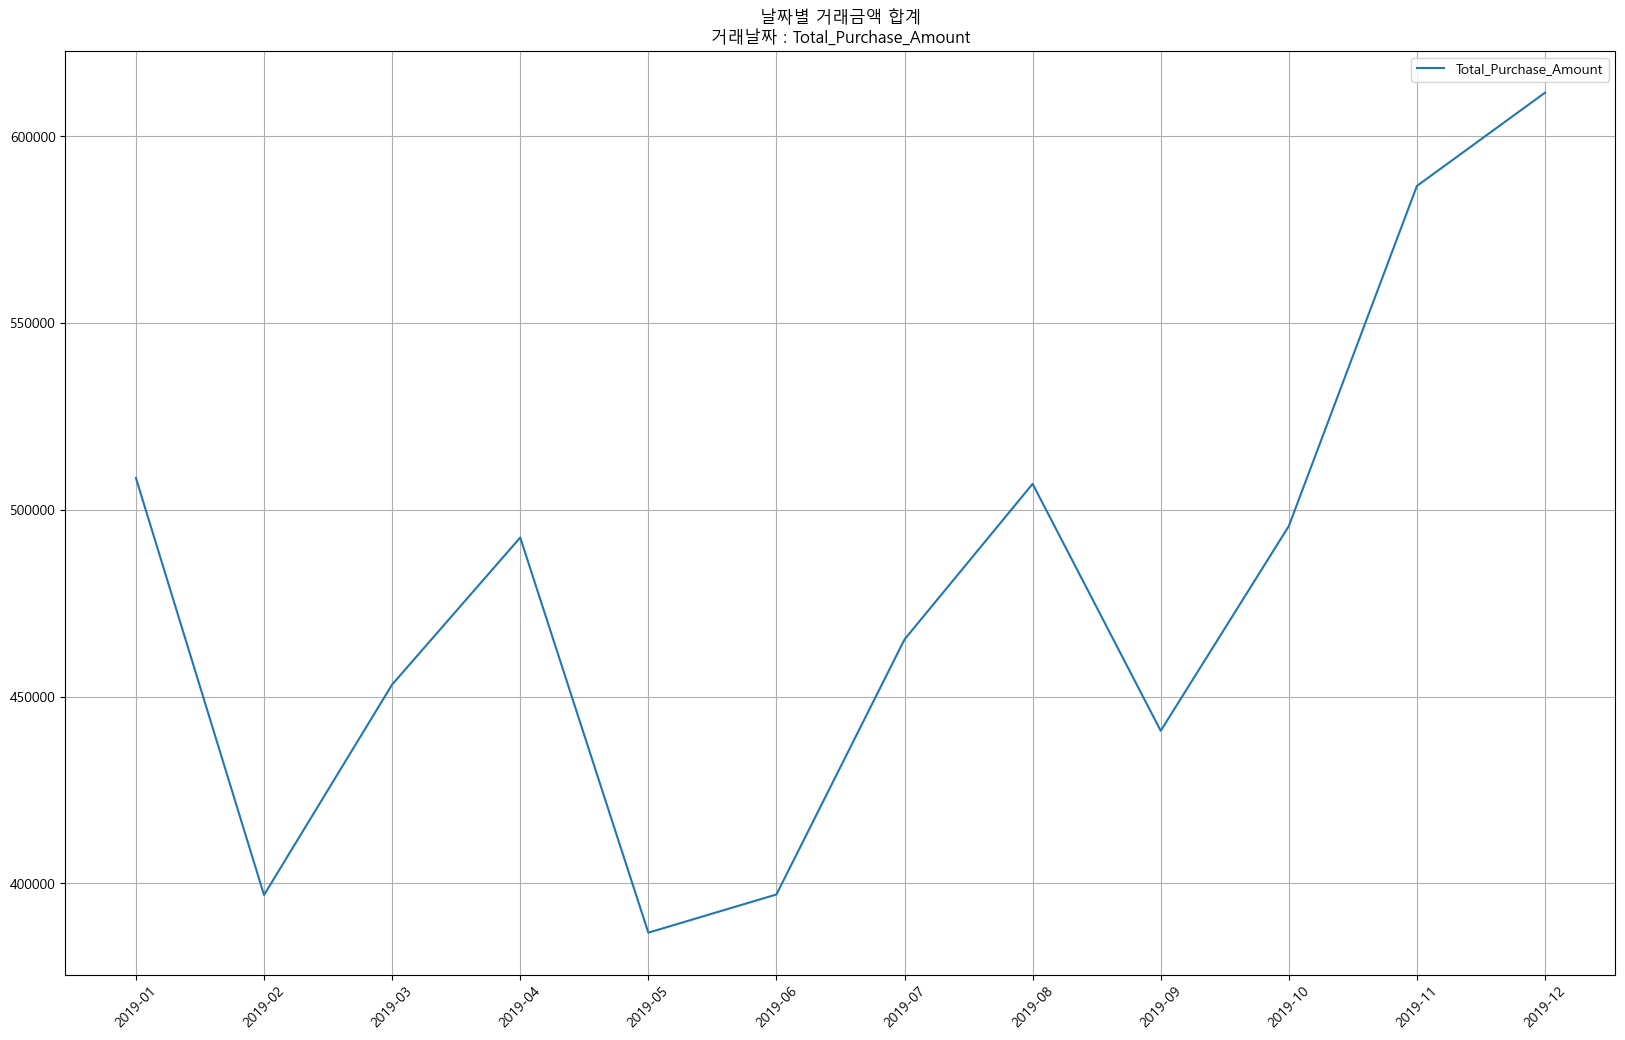

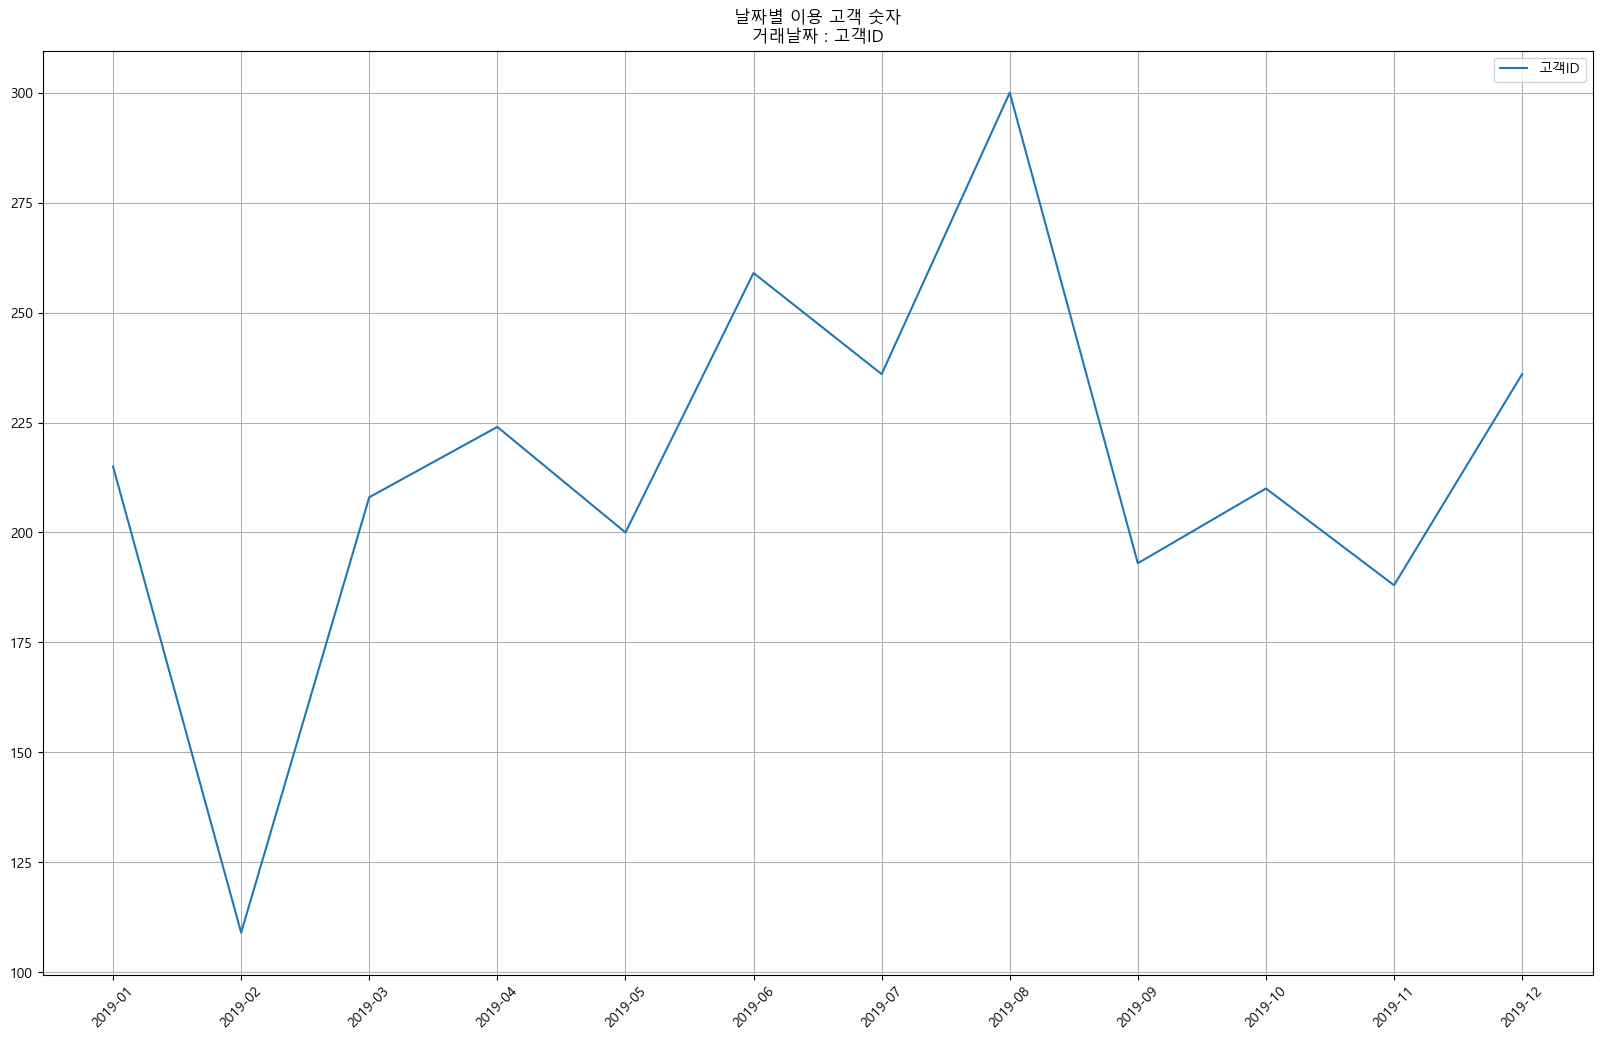

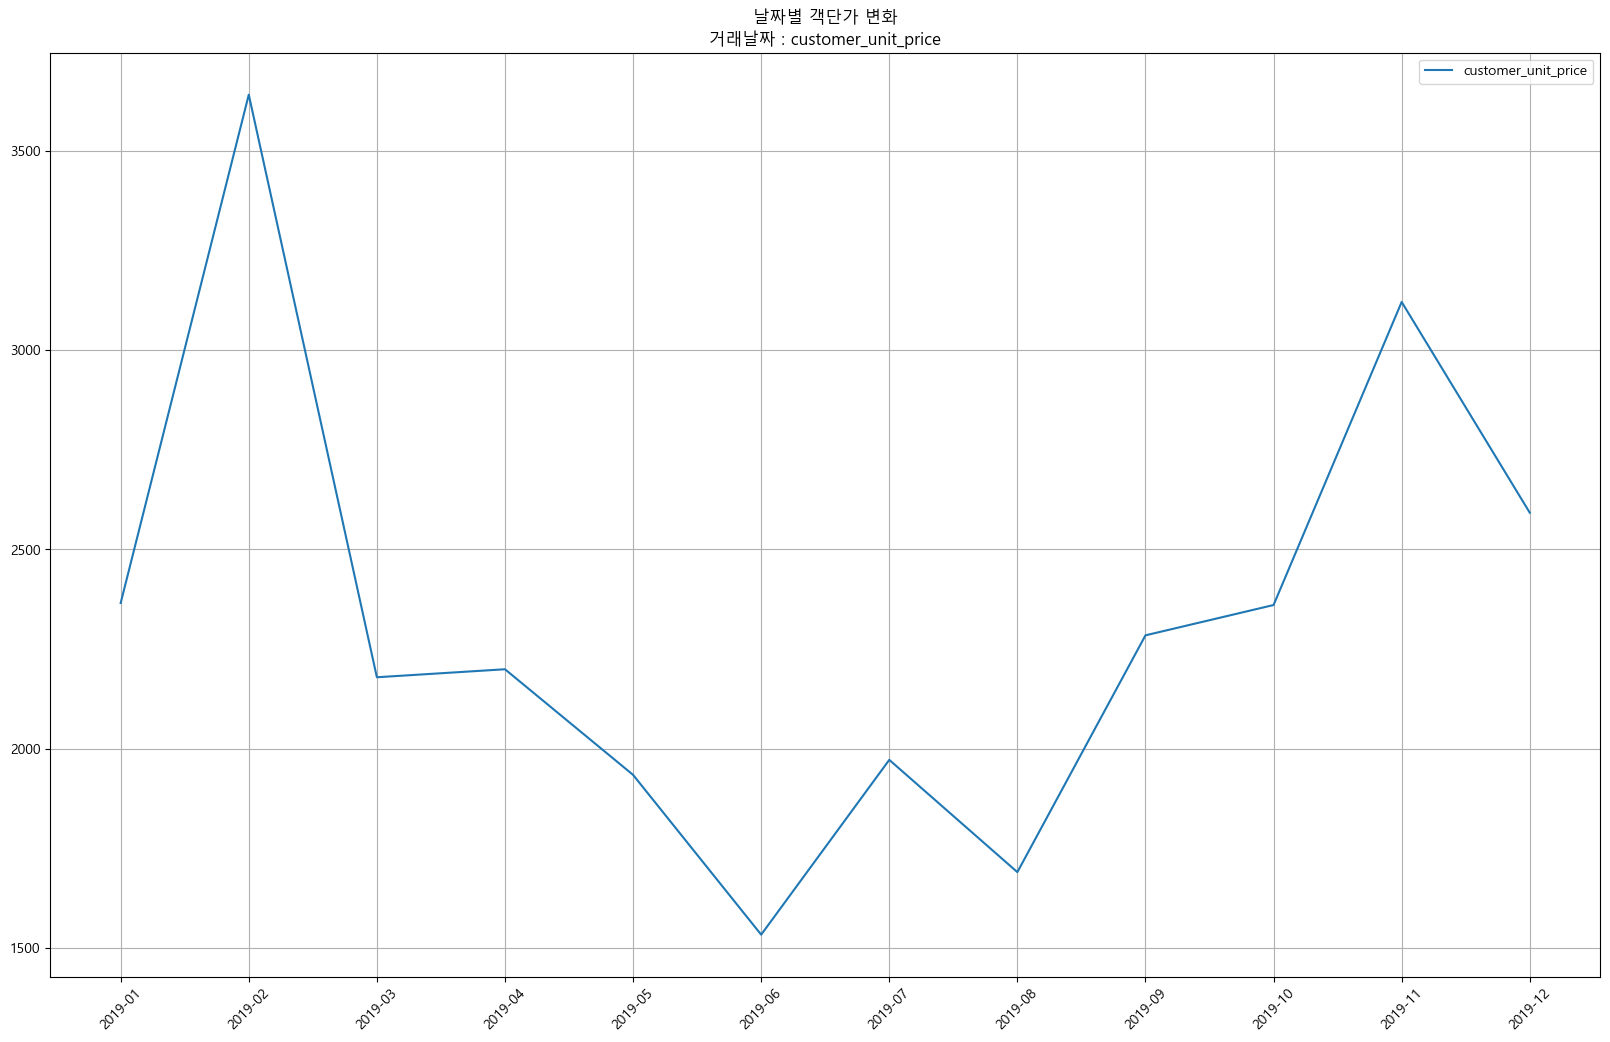

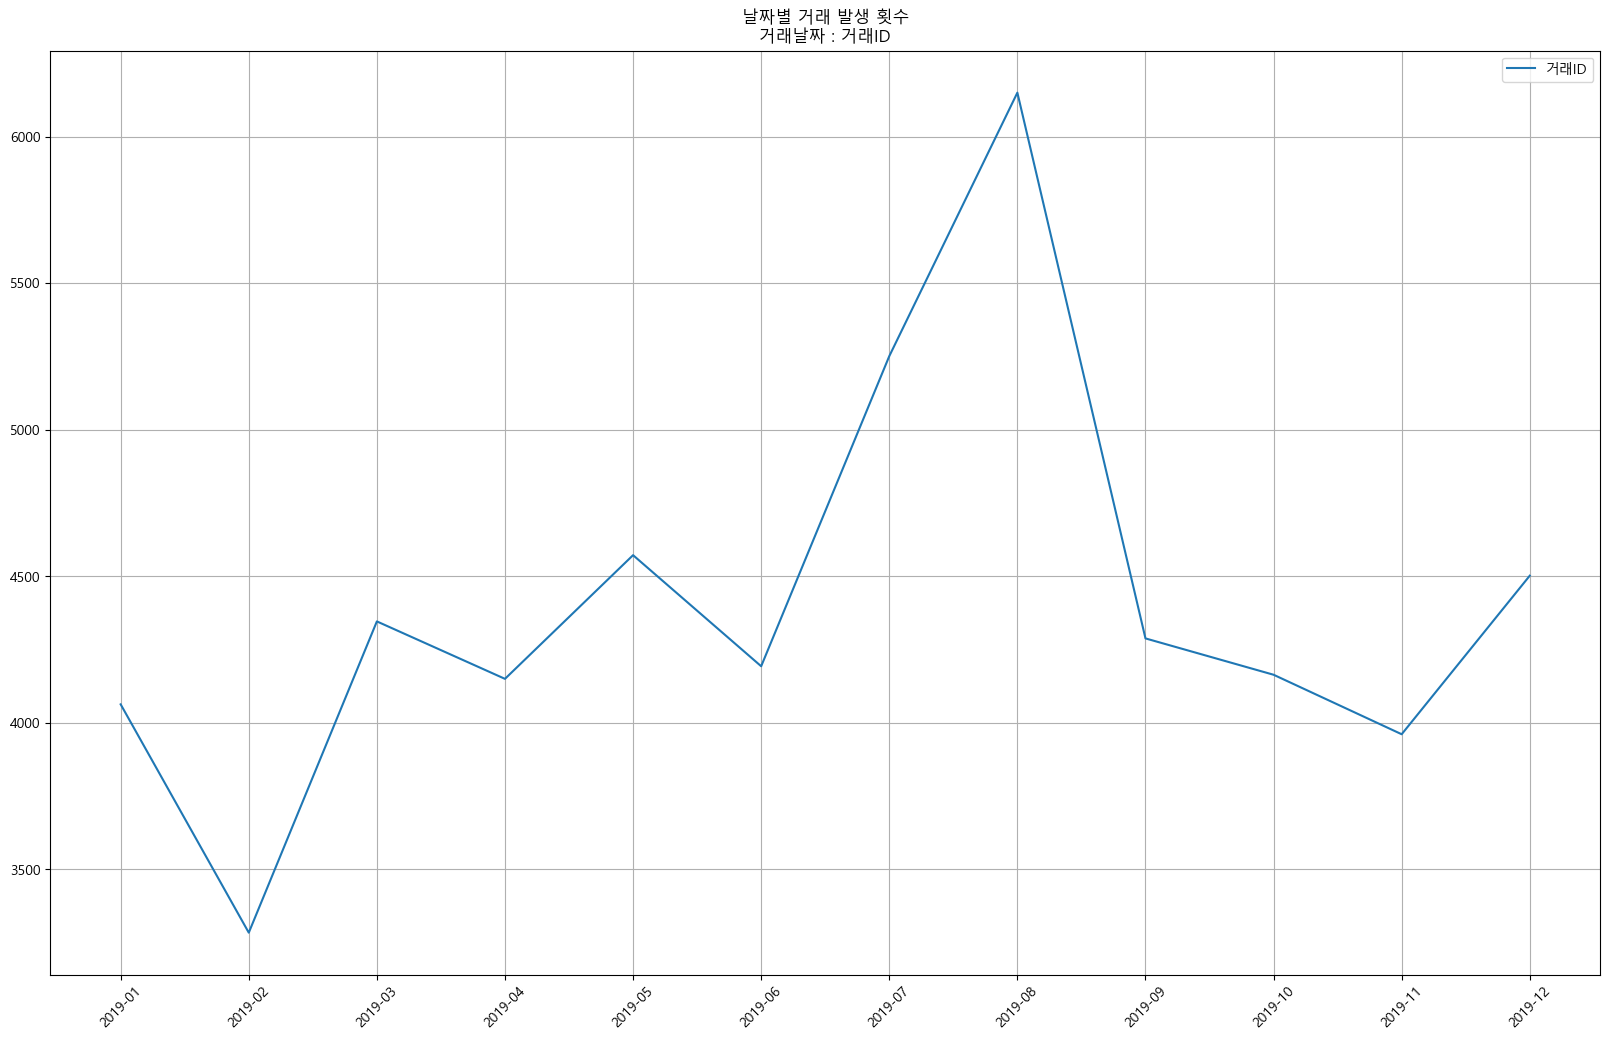

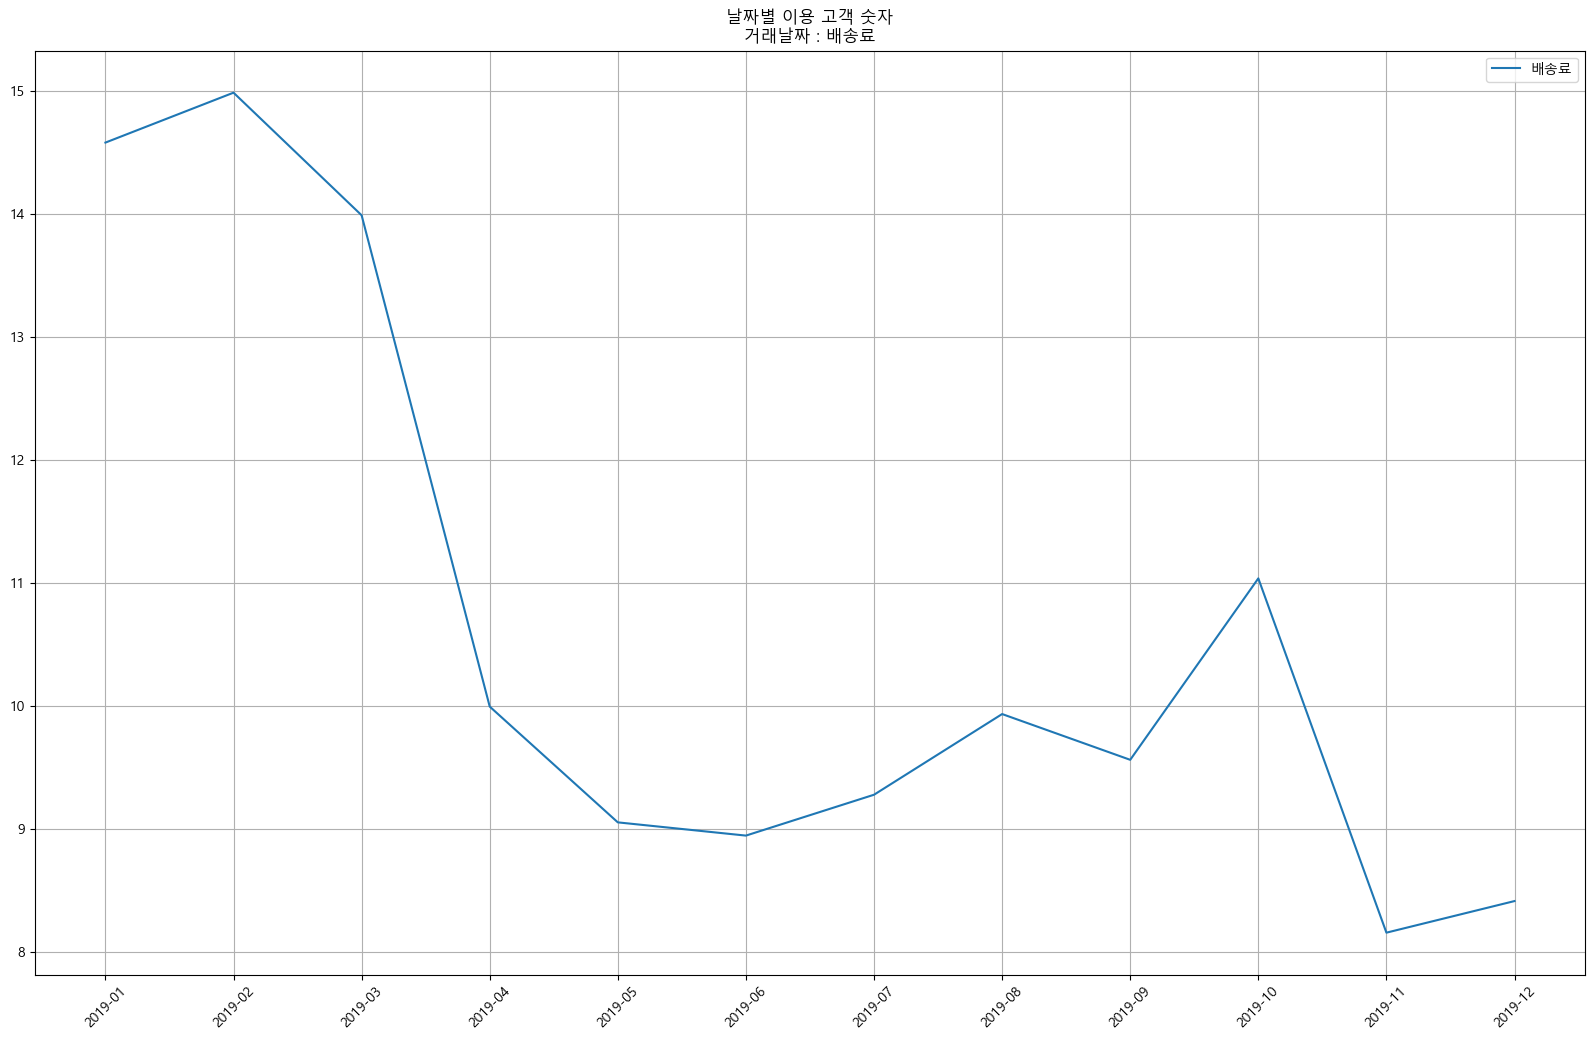

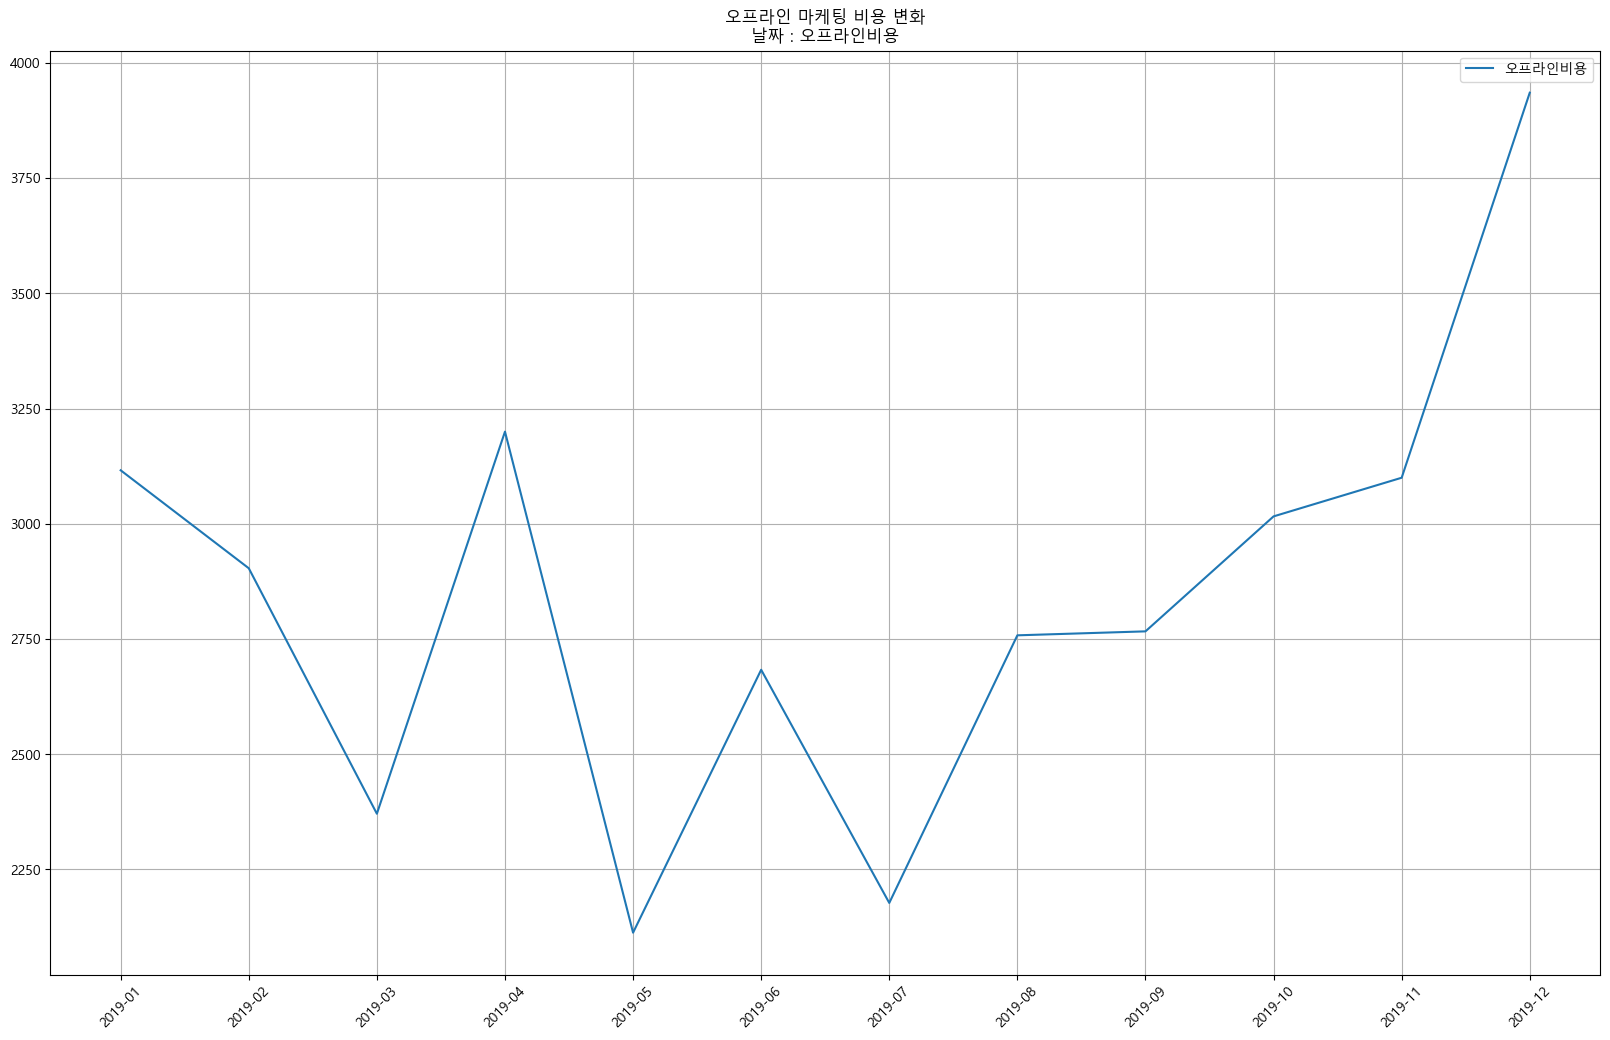

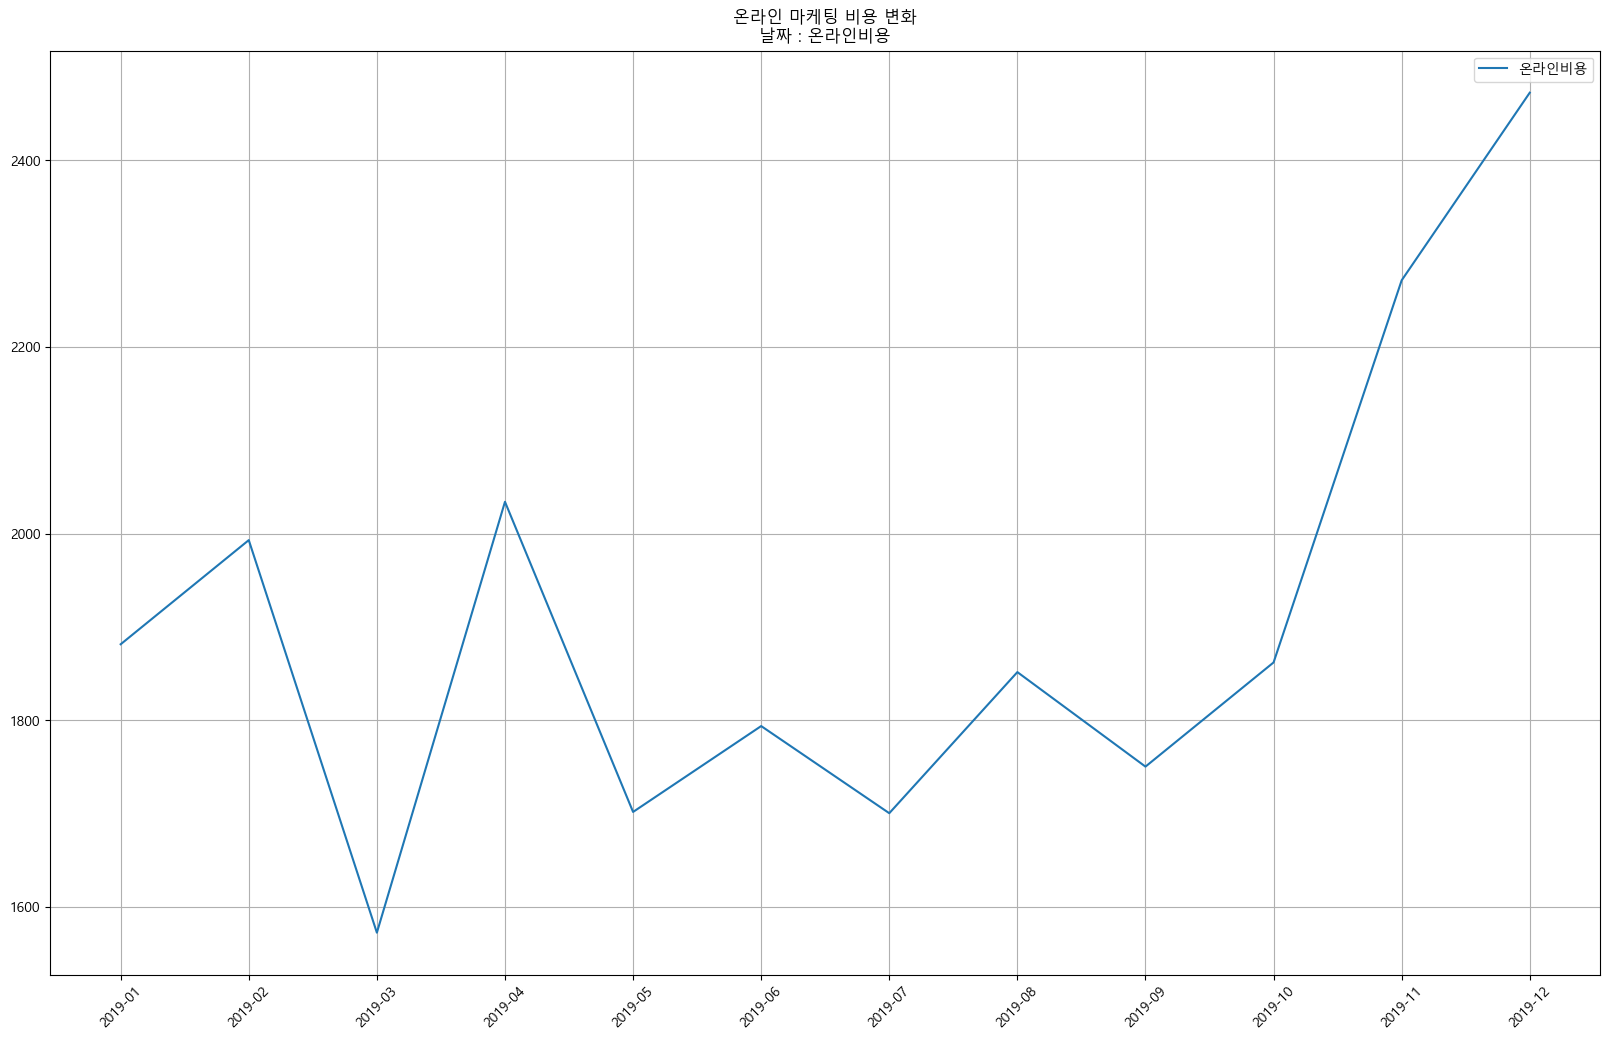

In [16]:
# 날짜별 거래금액 합계
total_information_money = total_information_temp.groupby(by='거래날짜', as_index = False)['Total_Purchase_Amount'].sum()
x_y_graph(total_information_money, x = '거래날짜', y = 'Total_Purchase_Amount', title='날짜별 거래금액 합계', how = 'plot')

# 날짜별 이용 고객 숫자
total_information_customer = total_information_temp.groupby(by = '거래날짜', as_index = False)['고객ID'].nunique()
x_y_graph(total_information_customer, x= '거래날짜', y= '고객ID', title = '날짜별 이용 고객 숫자', how = 'plot')

# 객단가
x_y_graph(total_customer_unit_price, x = '거래날짜', y= 'customer_unit_price', title = '날짜별 객단가 변화', how='plot')

# 날짜별 거래 발생 횟수
total_information_count = total_information_temp.groupby(by='거래날짜', as_index = False)['거래ID'].count()
x_y_graph(total_information_count, x = '거래날짜', y = '거래ID', title='날짜별 거래 발생 횟수', how = 'plot')


# 날짜별 배송료 평균
total_information_delivery = total_information_temp.groupby(by = '거래날짜', as_index = False)['배송료'].mean()
x_y_graph(total_information_delivery, x= '거래날짜', y= '배송료', title = '날짜별 이용 고객 숫자', how = 'plot')

# 마케팅 비용 변화 추이
marketing = pd.read_csv('./origin/Marketing_info.csv')
marketing = to_month(marketing, '날짜')
offline_marketing = marketing[['날짜','오프라인비용']].groupby('날짜', as_index=False)['오프라인비용'].mean()
online_marketing = marketing[['날짜','온라인비용']].groupby('날짜', as_index=False)['온라인비용'].mean()
x_y_graph(offline_marketing, x ='날짜', y='오프라인비용', title = '오프라인 마케팅 비용 변화', how='plot')
x_y_graph(online_marketing, x ='날짜', y='온라인비용', title = '온라인 마케팅 비용 변화', how='ㅔㅣㅐㅅ')

# # 날짜별 할인율의 변화
# coupon_trend = csv_analysis(pd.read_csv('../preprocessing/coupon_trend.csv'))
# # coupon_trend.check()
# coupon_trend.x_y_graph('Month', '할인율', title = '날짜별 할인율의 변화')

## 인공지능 활용을 위한 Class

In [79]:
class AI:
    ######################## data ###########################
    def __init__(self,df):
        self.df = df

    ######################## AI ###########################
    def data_setting(self, drop_cols, target_col, test_size_value):
        self.x = self.df.drop(drop_cols, axis=1)
        self.y = self.df[target_col]
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size = test_size_value)

    def AI_training(self, select_model):
        self.model = select_model
        self.model.fit(self.x_train, self.y_train)

    def AI_classifier_performance(self):
        y_pred = self.model.predict(self.x_test)
        print('Accuracy :', self.model.score(self.x_test, self.y_test))
        print('classification_report\n:', classification_report(self.y_test, y_pred) )

    def AI_classifier_importances(self):
        self.feature_importances_ = pd.DataFrame({'feature':self.x.columns, 'importances':self.model.feature_importances_})
        print('변수별 feature_importances :',self.model.feature_importances_)
        display(self.feature_importances_)

    def AI_Regression_coef(self):
        self.coef = pd.DataFrame({'feature':self.x.columns, 'coefficient':self.model.coef_[0]})
        print('변수별 coefficient :',self.model.coef_)
        display(self.coef)
    
    def AI_Regression_performance(self):
        y_pred = self.model.predict(self.x_test)
        print('mean_absolute_error :',mean_absolute_error(self.y_test, y_pred))
        print('r2_score :',r2_score(self.y_test, y_pred))

## 첫 방문월 기준으로 고객 정보 분석

In [18]:
pd.read_csv('./preprocessing/total_information.csv')

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,GST,Total_Purchase_Amount
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,0.10,175.5810
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,0.10,175.5810
2,USER_1358,Transaction_0013,2019-01-01,Product_0983,Nest-USA,2,122.77,6.50,Not Used,남,Chicago,12,0.10,276.5940
3,USER_1358,Transaction_0015,2019-01-01,Product_0984,Nest-USA,1,81.50,6.50,Clicked,남,Chicago,12,0.10,96.1500
4,USER_1358,Transaction_0016,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Clicked,남,Chicago,12,0.10,175.5810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0442,Transaction_7918,2019-05-04,Product_0850,More Bags,5,17.59,18.12,Clicked,여,California,13,0.18,121.9010
52920,USER_0557,Transaction_7940,2019-05-04,Product_0850,More Bags,1,17.59,6.00,Not Used,남,California,36,0.18,26.7562
52921,USER_1374,Transaction_8818,2019-05-19,Product_0850,More Bags,1,21.99,6.00,Used,여,Chicago,27,0.18,31.9482
52922,USER_0994,Transaction_9049,2019-05-22,Product_0850,More Bags,1,17.59,51.99,Used,여,New York,46,0.18,72.7462


In [19]:
def first_order_month(df, customer_col, period_col, select_month):
    df = to_month(df, period_col)
    df_group = df.groupby(customer_col, as_index=False)[period_col].min()
    df_group = df_group.loc[df_group[period_col]==select_month]
    customer_list = list(df_group[customer_col])
    select_df = df[df[customer_col].isin(customer_list)]
    return select_df

analysis = pd.read_csv('./preprocessing/total_information.csv')
analysis['성별'] = analysis['성별'].map({'남':1, '여':0})
analysis['쿠폰상태'] = analysis['쿠폰상태'].map({'Used':1, 'Not Used':0, 'Clicked':0})
display(analysis.info())
display(analysis)

cluster_1 = first_order_month(analysis, customer_col='고객ID', period_col='거래날짜', select_month = '2019-01')
cluster_2 = first_order_month(analysis, customer_col='고객ID', period_col='거래날짜', select_month = '2019-02')
cluster_3 = first_order_month(analysis, customer_col='고객ID', period_col='거래날짜', select_month = '2019-03')
cluster_4 = first_order_month(analysis, customer_col='고객ID', period_col='거래날짜', select_month = '2019-04')
cluster_5 = first_order_month(analysis, customer_col='고객ID', period_col='거래날짜', select_month = '2019-05')
cluster_6 = first_order_month(analysis, customer_col='고객ID', period_col='거래날짜', select_month = '2019-06')
cluster_7 = first_order_month(analysis, customer_col='고객ID', period_col='거래날짜', select_month = '2019-07')
cluster_8 = first_order_month(analysis, customer_col='고객ID', period_col='거래날짜', select_month = '2019-08')
cluster_9 = first_order_month(analysis, customer_col='고객ID', period_col='거래날짜', select_month = '2019-09')
cluster_10 = first_order_month(analysis, customer_col='고객ID', period_col='거래날짜', select_month = '2019-10')
cluster_11 = first_order_month(analysis, customer_col='고객ID', period_col='거래날짜', select_month = '2019-11')
cluster_12 = first_order_month(analysis, customer_col='고객ID', period_col='거래날짜', select_month = '2019-12')
print( analysis.shape[0] == ( cluster_1.shape[0]+cluster_2.shape[0]+cluster_3.shape[0]+cluster_4.shape[0]+cluster_5.shape[0] # 잘 분리되었는지 확인
                            +cluster_6.shape[0]+cluster_7.shape[0]+cluster_8.shape[0]+cluster_9.shape[0]+ cluster_10.shape[0] + cluster_11.shape[0] + cluster_12.shape[0] ) )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   고객ID                   52924 non-null  object 
 1   거래ID                   52924 non-null  object 
 2   거래날짜                   52924 non-null  object 
 3   제품ID                   52924 non-null  object 
 4   제품카테고리                 52924 non-null  object 
 5   수량                     52924 non-null  int64  
 6   평균금액                   52924 non-null  float64
 7   배송료                    52924 non-null  float64
 8   쿠폰상태                   52924 non-null  int64  
 9   성별                     52924 non-null  int64  
 10  고객지역                   52924 non-null  object 
 11  가입기간                   52924 non-null  int64  
 12  GST                    52924 non-null  float64
 13  Total_Purchase_Amount  52924 non-null  float64
dtypes: float64(4), int64(4), object(6)
memory usage: 5.7+ 

None

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,GST,Total_Purchase_Amount
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,1,1,Chicago,12,0.10,175.5810
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,1,1,Chicago,12,0.10,175.5810
2,USER_1358,Transaction_0013,2019-01-01,Product_0983,Nest-USA,2,122.77,6.50,0,1,Chicago,12,0.10,276.5940
3,USER_1358,Transaction_0015,2019-01-01,Product_0984,Nest-USA,1,81.50,6.50,0,1,Chicago,12,0.10,96.1500
4,USER_1358,Transaction_0016,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,0,1,Chicago,12,0.10,175.5810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0442,Transaction_7918,2019-05-04,Product_0850,More Bags,5,17.59,18.12,0,0,California,13,0.18,121.9010
52920,USER_0557,Transaction_7940,2019-05-04,Product_0850,More Bags,1,17.59,6.00,0,1,California,36,0.18,26.7562
52921,USER_1374,Transaction_8818,2019-05-19,Product_0850,More Bags,1,21.99,6.00,1,0,Chicago,27,0.18,31.9482
52922,USER_0994,Transaction_9049,2019-05-22,Product_0850,More Bags,1,17.59,51.99,1,0,New York,46,0.18,72.7462


True


In [20]:
cluster_1 = first_order_month(analysis, customer_col='고객ID', period_col='거래날짜', select_month = '2019-01')
cluster_1 = AI(cluster_1)
cluster_1.data_setting(drop_cols=['고객ID', '거래ID', '거래날짜', '제품ID', '제품카테고리',
       '고객지역', '가입기간', 'GST', 'Total_Purchase_Amount'], target_col='Total_Purchase_Amount', test_size_value=0.3)
cluster_1.AI_training(LinearRegression())
cluster_1.AI_Regression_performance()

mean_absolute_error : 52.970545947915056
r2_score : 0.4490295828121358


In [21]:
cluster_2 = first_order_month(analysis, customer_col='고객ID', period_col='거래날짜', select_month = '2019-02')
cluster_2 = AI(cluster_2)
cluster_2.data_setting(drop_cols=['고객ID', '거래ID', '거래날짜', '제품ID', '제품카테고리',
       '고객지역', '가입기간', 'GST', 'Total_Purchase_Amount'], target_col='Total_Purchase_Amount', test_size_value=0.3)
cluster_2.AI_training(LinearRegression())
cluster_2.AI_Regression_performance()

mean_absolute_error : 46.44448854162837
r2_score : 0.6086066606921476


# 월 단위 분석

- <span style="font-style:italic; color:brown">2019년 1월</span>
    - 신규 유입 고객들의 거래 금액의 합계가 가장 크다.
    - 거래당 배송료의 평균이 두 번째로 크다.
    - 할인율 낮은 달

- <span style="font-style:italic; color:brown">2019년 2월</span>
    - 거래 발생 횟수가 제일 적다.
    - 이용 고객 숫자가 가장 적다.
    - 거래 금액 합계가 매우 작다.
    - 거래당 배송료 평균이 가장 크다.
- <span style="font-style:italic; color:brown">2019년 3월</span>
    - 할인율 높은 달
    - 거래당 배송료 평균이 높은 편.
- <span style="font-style:italic; color:brown">2019년 4월</span>
    - 할인율 낮은 달
- <span style="font-style:italic; color:brown">2019년 5월</span>
    - 거래 금액 합계가 매우 작다.
    - 이용 고객 숫자가 많은 편
    - 거래당 배송료 평균 낮은 편
- <span style="font-style:italic; color:brown">2019년 6월</span>
    - 거래 금액 합계가 매우 작다.
    - 거래당 배송료 평균 낮은 편
    - 할인율 높은 달
- <span style="font-style:italic; color:brown">2019년 7월</span>
    - 신규 유입 고객들의 거래 금액의 합계가 매우 작다.
    - 모든 단위 집단의 전월 대비 사용 금액 증가, 바로 직전에 유입된 2019-06 집단은 제외
    - 2019-01, 2019-02, 2019-03, 2019-04, 2019-05
    - 배송료 평균 낮은 편
    - 할인율 낮은 달
- <span style="font-style:italic; color:brown">2019년 8월</span>
  
    - 거래 발생 횟수가 가장 많다.
    - 이용 고객 숫자가 가장 많다.
- <span style="font-style:italic; color:brown">2019년 9월</span>
    - 신규 유입 고객들의 거래 금액의 합계가 매우 작다.
    - 모든 단위 집단의 전월 대비 재방문율 감소, 바로 직전에 유입된 2019-08 집단은 제외
    - 2019-01, 2019-02, 2019-03, 2019-04, 2019-05, 2019-06, 2019-07 
    - 할인율 높은 달
- <span style="font-style:italic; color:brown">2019년 10월</span>
    - 할인율 낮은 달
- <span style="font-style:italic; color:brown">2019년 11월</span>
    - 거래당 배송료 평균이 매우 낮다.
- <span style="font-style:italic; color:brown">2019년 12월</span>
    - 거래 금액의 합계가 가장 크다.
    - 거래당 배송료 평균이 매우 낮다.
    - 할인율 높은 달

# 코호트 군집 분석
- <span style="font-style:italic; color:brown">2019년 1월 유입 고객</span>

- <span style="font-style:italic; color:brown">2019년 2월 유입 고객</span>
    
- <span style="font-style:italic; color:brown">2019년 3월 유입 고객</span>
    
- <span style="font-style:italic; color:brown">2019년 4월 유입 고객</span>
    
- <span style="font-style:italic; color:brown">2019년 5월 유입 고객</span>
    
- <span style="font-style:italic; color:brown">2019년 6월 유입 고객</span>
    
- <span style="font-style:italic; color:brown">2019년 7월 유입 고객</span>
    
- <span style="font-style:italic; color:brown">2019년 8월 유입 고객</span>
  
- <span style="font-style:italic; color:brown">2019년 9월 유입 고객</span>
    
- <span style="font-style:italic; color:brown">2019년 10월 유입 고객</span>
    
- <span style="font-style:italic; color:brown">2019년 11월 유입 고객</span>
    
len style="font-sbronw">201>2019e:italic; colo9년 12월 유입 고객</span>높은 달

# RFM
- 백분위 수를 기준으로 구간 나누기
- Target 값을 정하고, 인공지능 분류 모델을 통해 변수별 중요도 파악
- (핵심) 어떤 값을 Target으로 지정할지 AND 이진 분류 혹은 다중 분류 중 선택
- RFM Score = 등급 구간 * 해당 변수 중요도
- 중요도를 바로 곱하면, 값의 왜곡 가능성 존재
    - ex) 20000 * 0.2, 20 * 0.9 상황을 가정하면, 중요도는 상관없이 값 자체의 크기에 의해서만 결정
    - 따라서) 3 * 0.2, 4 * 0.9

In [22]:
total_information = pd.read_csv('./preprocessing/total_information.csv')
total_information

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,GST,Total_Purchase_Amount
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,0.10,175.5810
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,0.10,175.5810
2,USER_1358,Transaction_0013,2019-01-01,Product_0983,Nest-USA,2,122.77,6.50,Not Used,남,Chicago,12,0.10,276.5940
3,USER_1358,Transaction_0015,2019-01-01,Product_0984,Nest-USA,1,81.50,6.50,Clicked,남,Chicago,12,0.10,96.1500
4,USER_1358,Transaction_0016,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Clicked,남,Chicago,12,0.10,175.5810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0442,Transaction_7918,2019-05-04,Product_0850,More Bags,5,17.59,18.12,Clicked,여,California,13,0.18,121.9010
52920,USER_0557,Transaction_7940,2019-05-04,Product_0850,More Bags,1,17.59,6.00,Not Used,남,California,36,0.18,26.7562
52921,USER_1374,Transaction_8818,2019-05-19,Product_0850,More Bags,1,21.99,6.00,Used,여,Chicago,27,0.18,31.9482
52922,USER_0994,Transaction_9049,2019-05-22,Product_0850,More Bags,1,17.59,51.99,Used,여,New York,46,0.18,72.7462


In [23]:
def RFM_Setting(df, customer_col, period_col, transaction_col, monetary_col):
    df[period_col] = pd.to_datetime(df[period_col])
    last_date = df[period_col].max() # 데이터 내에서 가장 마지막 날짜와 얼마나 가까운지를 기준으로 recency를 구한다.
    recency_data = df.groupby(customer_col, as_index=False)[period_col].max() # recency
    recency_data['Recency'] = (last_date- recency_data[period_col]).dt.days
    frequency_data = df.groupby(customer_col, as_index=False)[transaction_col].count()# frequency
    frequency_data.rename(columns={transaction_col:'Frequency'}, inplace = True)
    monetary_data = df.groupby(customer_col, as_index=False)[monetary_col].sum() # monetary
    monetary_data.rename(columns = {monetary_col:'Monetary'}, inplace=True)
    
    rfm_df = pd.merge(recency_data, frequency_data, on=customer_col)
    rfm_df = pd.merge(rfm_df, monetary_data, on=customer_col)
    rfm_df.rename(columns={'거래날짜':'last_ord_date'}, inplace=True)
    return rfm_df

total_information = pd.read_csv('./preprocessing/total_information.csv')
rfm_df = RFM_Setting(df=total_information, customer_col='고객ID', period_col='거래날짜', transaction_col='거래ID', monetary_col='Total_Purchase_Amount')
rfm_df

,고객ID,last_ord_date,Recency,Frequency,Monetary
0,USER_0000,2019-09-15,107,2,185.6882
1,USER_0001,2019-11-02,59,60,16567.9470
2,USER_0002,2019-10-19,73,23,1842.8708
3,USER_0003,2019-12-14,17,17,1636.2142
4,USER_0004,2019-09-15,107,36,2231.7198
...,...,...,...,...,...
1463,USER_1463,2019-04-05,270,7,873.8902
1464,USER_1464,2019-10-05,87,40,3272.6406
1465,USER_1465,2019-06-20,194,8,171.0864
1466,USER_1466,2019-10-23,69,1,333.8000


In [24]:
def up_down_check(df): # 전월 대비 상승이 있었는지 확인
    dict_df = {}
    for i in df.columns:
        # print(i)
        count=0
        for j in range(1, len(df.columns)):
            # print( df.loc[j,i], df.loc[j+1,i])
            if df.loc[j,i] < df.loc[j+1,i]:
                # print( df.loc[j,i], df.loc[j+1,i])
                count+=1
        dict_df[str(i)] = count
    return dict_df

def up_down_merge(df, up_down_dict, new_col_name, period_col): # updown 정보를 결합
    for i in up_down_dict.keys():
        # print(i, up_down_dict[i])
        df.loc[df[period_col]==i, new_col_name] = up_down_dict[i]
    return df

retention_temp = retention.df.T
retention_temp = retention_temp.fillna(0)
retention_up_down = up_down_check(retention_temp)
# display(retention_up_down)

co_purchase_temp = co_purchase.df.T
co_purchase_temp = co_purchase_temp.fillna(0)
co_purchase_up_down = up_down_check(co_purchase_temp)
# display(co_purchase_up_down)

total_information_first_ord = total_information.groupby('고객ID', as_index=False)['거래날짜'].min()
total_information_first_ord = to_month(total_information_first_ord,'거래날짜')

up_down_df = up_down_merge(df=total_information_first_ord, up_down_dict=retention_up_down,new_col_name ='retention_up_down', period_col = '거래날짜')
up_down_df = up_down_merge(df=total_information_first_ord, up_down_dict=co_purchase_up_down,new_col_name ='co_purchase_up_down', period_col = '거래날짜')
up_down_df

,고객ID,거래날짜,retention_up_down,co_purchase_up_down
0,USER_0000,2019-09,0.0,1.0
1,USER_0001,2019-03,4.0,3.0
2,USER_0002,2019-06,2.0,3.0
3,USER_0003,2019-12,0.0,0.0
4,USER_0004,2019-09,0.0,1.0
...,...,...,...,...
1463,USER_1463,2019-04,2.0,3.0
1464,USER_1464,2019-06,2.0,3.0
1465,USER_1465,2019-04,2.0,3.0
1466,USER_1466,2019-10,0.0,0.0


In [25]:
def grade_setting(x): # 바로 imo
    if x <= n1:
        return 1
    elif x > n1 and x <= n2:
        return 2
    elif x > n2 and x <= n3:
        return 3
    else:
        return 4

def grade_setting_reverse(x):
    if x <= n1:
        return 4
    elif x > n1 and x <= n2:
        return 3
    elif x > n2 and x <= n3:
        return 2
    else:
        return 1

n1, n2, n3 = np.percentile(rfm_df['Recency'], [25, 50, 75])
print('Recency의 백분위수 :',n1, n2, n3)
rfm_df['Recency_Grade'] = rfm_df['Recency'].apply(grade_setting_reverse)

n1, n2, n3 = np.percentile(rfm_df['Frequency'], [25, 50, 75])
print('Frequency의 백분위수 :',n1, n2, n3)
rfm_df['Frequency_Grade'] = rfm_df['Frequency'].apply(grade_setting)

n1, n2, n3 = np.percentile(rfm_df['Monetary'], [25, 50, 75])
print('Monetary의 백분위수 :',n1, n2, n3)
rfm_df['Monetary_Grade'] = rfm_df['Monetary'].apply(grade_setting)

display(rfm_df)

Recency의 백분위수 : 55.0 131.0 220.0
Frequency의 백분위수 : 10.0 21.0 46.0
Monetary의 백분위수 : 841.3960500000001 2166.0415000000003 4764.865075


,고객ID,last_ord_date,Recency,Frequency,Monetary,Recency_Grade,Frequency_Grade,Monetary_Grade
0,USER_0000,2019-09-15,107,2,185.6882,3,1,1
1,USER_0001,2019-11-02,59,60,16567.9470,3,4,4
2,USER_0002,2019-10-19,73,23,1842.8708,3,3,2
3,USER_0003,2019-12-14,17,17,1636.2142,4,2,2
4,USER_0004,2019-09-15,107,36,2231.7198,3,3,3
...,...,...,...,...,...,...,...,...
1463,USER_1463,2019-04-05,270,7,873.8902,1,1,2
1464,USER_1464,2019-10-05,87,40,3272.6406,3,3,3
1465,USER_1465,2019-06-20,194,8,171.0864,2,1,1
1466,USER_1466,2019-10-23,69,1,333.8000,3,1,1


In [104]:
rfm_df_temp = rfm_df.copy()
rfm_df_temp['retention_info'] = up_down_df['retention_up_down']
rfm_df_temp['co_purchase_info'] = up_down_df['co_purchase_up_down']
rfm_df_temp

,고객ID,last_ord_date,Recency,Frequency,Monetary,Recency_Grade,Frequency_Grade,Monetary_Grade,retention_info,co_purchase_info
0,USER_0000,2019-09-15,107,2,185.6882,3,1,1,0.0,1.0
1,USER_0001,2019-11-02,59,60,16567.9470,3,4,4,4.0,3.0
2,USER_0002,2019-10-19,73,23,1842.8708,3,3,2,2.0,3.0
3,USER_0003,2019-12-14,17,17,1636.2142,4,2,2,0.0,0.0
4,USER_0004,2019-09-15,107,36,2231.7198,3,3,3,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,2019-04-05,270,7,873.8902,1,1,2,2.0,3.0
1464,USER_1464,2019-10-05,87,40,3272.6406,3,3,3,2.0,3.0
1465,USER_1465,2019-06-20,194,8,171.0864,2,1,1,2.0,3.0
1466,USER_1466,2019-10-23,69,1,333.8000,3,1,1,0.0,0.0


In [124]:
rfm_df_retention_analysis = AI(rfm_df_temp)
rfm_df_retention_analysis.data_setting(drop_cols=['고객ID', 'last_ord_date', 'retention_info', 'co_purchase_info', 'Recency_Grade','Frequency_Grade', 'Monetary_Grade'], target_col='retention_info', test_size_value=0.3) # retention_info coefficient 계산
rfm_df_retention_analysis.AI_training( RandomForestClassifier(random_state=100) )
rfm_df_retention_analysis.AI_classifier_performance()
rfm_df_retention_analysis.AI_classifier_importances()

Accuracy : 0.6009070294784581
classification_report
:               precision    recall  f1-score   support

         0.0       0.64      0.86      0.74       107
         1.0       0.58      0.55      0.56        40
         2.0       0.59      0.67      0.63       115
         3.0       0.42      0.19      0.26        26
         4.0       0.59      0.48      0.53        60
         5.0       0.32      0.24      0.27        29
         6.0       0.72      0.52      0.60        64

    accuracy                           0.60       441
   macro avg       0.55      0.50      0.51       441
weighted avg       0.59      0.60      0.59       441

변수별 feature_importances : [0.48670411 0.22421115 0.28908473]


,feature,importances
0,Recency,0.486704
1,Frequency,0.224211
2,Monetary,0.289085


In [125]:
def feature_scoring(df, importances, grade_col, rfm_col, new_col):
    df[new_col[0]] = df.loc[:,grade_col[0]] * importances.loc[importances['feature']==rfm_col[0], 'importances'].values
    df[new_col[1]] = df.loc[:,grade_col[1]] * importances.loc[importances['feature']==rfm_col[1], 'importances'].values
    df[new_col[2]] = df.loc[:,grade_col[2]] * importances.loc[importances['feature']==rfm_col[2], 'importances'].values
    return df

rfm_df_temp = feature_scoring(rfm_df_temp, rfm_df_retention_analysis.feature_importances_, 
                              ['Recency_Grade', 'Frequency_Grade', 'Monetary_Grade'], ['Recency', 'Frequency', 'Monetary'], 
                              ['retention_R', 'retention_F', 'retention_M'])

rfm_df_temp

,고객ID,last_ord_date,Recency,Frequency,Monetary,Recency_Grade,Frequency_Grade,Monetary_Grade,retention_info,co_purchase_info,retention_R,retention_F,retention_M
0,USER_0000,2019-09-15,107,2,185.6882,3,1,1,0.0,1.0,1.460112,0.224211,0.289085
1,USER_0001,2019-11-02,59,60,16567.9470,3,4,4,4.0,3.0,1.460112,0.896845,1.156339
2,USER_0002,2019-10-19,73,23,1842.8708,3,3,2,2.0,3.0,1.460112,0.672633,0.578169
3,USER_0003,2019-12-14,17,17,1636.2142,4,2,2,0.0,0.0,1.946816,0.448422,0.578169
4,USER_0004,2019-09-15,107,36,2231.7198,3,3,3,0.0,1.0,1.460112,0.672633,0.867254
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,2019-04-05,270,7,873.8902,1,1,2,2.0,3.0,0.486704,0.224211,0.578169
1464,USER_1464,2019-10-05,87,40,3272.6406,3,3,3,2.0,3.0,1.460112,0.672633,0.867254
1465,USER_1465,2019-06-20,194,8,171.0864,2,1,1,2.0,3.0,0.973408,0.224211,0.289085
1466,USER_1466,2019-10-23,69,1,333.8000,3,1,1,0.0,0.0,1.460112,0.224211,0.289085


In [126]:
rfm_df_co_purchase_analysis = AI(rfm_df_temp)
rfm_df_co_purchase_analysis.data_setting(drop_cols=['고객ID', 'last_ord_date', 'retention_info', 'co_purchase_info', 'Recency_Grade', 'Frequency_Grade', 'Monetary_Grade', 'retention_R', 'retention_F', 'retention_M'], 
                                         target_col='co_purchase_info', test_size_value=0.3) # retention_info coefficient 계산
rfm_df_co_purchase_analysis.AI_training( RandomForestClassifier(random_state=100) )
rfm_df_co_purchase_analysis.AI_classifier_performance()
rfm_df_co_purchase_analysis.AI_classifier_importances()

Accuracy : 0.5736961451247166
classification_report
:               precision    recall  f1-score   support

         0.0       0.54      0.72      0.62        67
         1.0       0.53      0.45      0.49        22
         2.0       0.42      0.46      0.44        39
         3.0       0.62      0.73      0.67       172
         4.0       0.57      0.21      0.30        39
         6.0       0.60      0.49      0.54        67
         7.0       0.61      0.31      0.42        35

    accuracy                           0.57       441
   macro avg       0.55      0.48      0.50       441
weighted avg       0.58      0.57      0.56       441

변수별 feature_importances : [0.53090546 0.2070791  0.26201544]


,feature,importances
0,Recency,0.530905
1,Frequency,0.207079
2,Monetary,0.262015


In [127]:
rfm_df_temp = feature_scoring(rfm_df_temp, rfm_df_co_purchase_analysis.feature_importances_, 
                              ['Recency_Grade', 'Frequency_Grade', 'Monetary_Grade'], ['Recency', 'Frequency', 'Monetary'], 
                              ['co_purchase_R', 'co_purchase_F', 'co_purchase_M'])

rfm_df_temp

,고객ID,last_ord_date,Recency,Frequency,Monetary,Recency_Grade,Frequency_Grade,Monetary_Grade,retention_info,co_purchase_info,retention_R,retention_F,retention_M,co_purchase_R,co_purchase_F,co_purchase_M
0,USER_0000,2019-09-15,107,2,185.6882,3,1,1,0.0,1.0,1.460112,0.224211,0.289085,1.592716,0.207079,0.262015
1,USER_0001,2019-11-02,59,60,16567.9470,3,4,4,4.0,3.0,1.460112,0.896845,1.156339,1.592716,0.828316,1.048062
2,USER_0002,2019-10-19,73,23,1842.8708,3,3,2,2.0,3.0,1.460112,0.672633,0.578169,1.592716,0.621237,0.524031
3,USER_0003,2019-12-14,17,17,1636.2142,4,2,2,0.0,0.0,1.946816,0.448422,0.578169,2.123622,0.414158,0.524031
4,USER_0004,2019-09-15,107,36,2231.7198,3,3,3,0.0,1.0,1.460112,0.672633,0.867254,1.592716,0.621237,0.786046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,2019-04-05,270,7,873.8902,1,1,2,2.0,3.0,0.486704,0.224211,0.578169,0.530905,0.207079,0.524031
1464,USER_1464,2019-10-05,87,40,3272.6406,3,3,3,2.0,3.0,1.460112,0.672633,0.867254,1.592716,0.621237,0.786046
1465,USER_1465,2019-06-20,194,8,171.0864,2,1,1,2.0,3.0,0.973408,0.224211,0.289085,1.061811,0.207079,0.262015
1466,USER_1466,2019-10-23,69,1,333.8000,3,1,1,0.0,0.0,1.460112,0.224211,0.289085,1.592716,0.207079,0.262015


# RFM 등급 나누기

# 전략
- retention 중요도
    - Recency > Monetary > Frequency
- co_purchase 중요도
    - Recency > Monetary > Frequency